# Introduction to Plotting with Plotnine

[Click here](https://neuronjolt.com/data/downloads/ch_04_plotnine.ipynb) to download this chapter as a Jupyter (.ipynb) file.

## Chapter Introduction

### Visualization

Visualizations are useful tools to help you better understand your data, and it is likely that you will need to produce visualizations for presentations and reports in other classes, for an organization you are involved with, for your internship, or for your job.  

There are many ways to create visualizations. You can use Excel, Google Charts, Tableau, or various packages that run in code-based tools such as python or R. In this chapter you will learn how to create visualizations with the plotnine python package. 

### Why Create Visualizations with Code?

While using code to create visualizations may feel strange to you at first, there are actually several advantages to doing so:

- **Code-based visualization tools are powerful and flexible** - With code-based tools you will be able to create a wide variety of visualizations and have a high level of control over details of the visualizations.
- **With code-based tools your visualizations are easy to replicate or revise** - After you have created a visualization you like you can rebuild it at any time by simply re-running the code. To create the same visualization with different data you can just change the data specification. To revise the visualization you can simply tweak the code.
- **With code-based tools it is easy to communicate to others how you created the visualization** - If you want to explain to someone how you made a visualization you can just send them the code. With tools such as Tableau and Excel you would have to detail all the steps you took (clicks on menus, buttons, etc.) and probably supplement your explanation with screenshots.
- **With code-based tools it is easy to save your work process and even search through your work** - Since your visualizations are created with code, which is just plain text, you can save the code for many visualizations without taking up much space on your computer. You could even search through your code files using various keywords to find the code for a specific visualization. Another advantage of code is that you can use a source code control system such as GitHub to keep track of different versions of your visualization code.

### Why the plotnine Package?

There are several different packages in python that can be used to make common statistical plots such as scatterplots, barplots, boxplots, histograms, and many others. One of the oldest packages for plotting in python is matplotlib, which was inspired by the plotting capabilities of MATLAB, a for-profit statistical software product. matplotlib is a huge package and allows a high degree of control and customization of plots. To get an idea of the types of visualizations it is possible to create with matplotlib take a look at the [python graph gallery](https://python-graph-gallery.com) or the [Top 50 matplotlib Visualizations](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/) website.  

However, because matplotlib is so huge and powerful it is not the easiest package to use, and the default plots it produces are not considered to be very attractive. Several other python visualization packages are essentially front ends to matplotlib. That is, they have a simplified code interface, but they produce matplotlib code and plots "under the hood." Seaborn is one example. Seaborn provides a simplified coding interface and produces good-looking plots with the default settings. The plots produced with seaborn are matplotlib plots, so all the power of matplotlib may be used to customize them if necessary. Plotnine is another example. Plotnine is modeled after the ggplot2 plotting package for R, which is among the favorite plotting packagea of many professionals who work with data daily. With ggplot2 you build plots component by component using a set of functions based on a "grammar of graphics," a systematic set of conventions for specifying the various parts of a plot. This approach is a favorite of many because it is flexible, powerful, and just makes sense. Plotnine works in the same way. In fact, plotnine syntax is 99% compatible with ggplot2 syntax, so by learning to make plots with plotnine you will also be learning to make plots in R with ggplot2! In addition, since ggplot2 is so popular there is a wealth of tutorials and examples of ggplot2 plots to be found online. Since plotnine is a python implementation of ggplot2 most parts of those tutorials also apply to plotnine, and you can re-create the vast majority of those plot examples with plotnine!

In this chapter you will learn how to make several fundamental statistical plots with the plotnine package, including scatterplots, histograms, kernel density plots, boxplots, simple bar plots, side-by-side bar plots, stacked bar plots, and standardized stacked bar plots. For more details about plotnine please see the [website for the plotnine package](https://plotnine.org) In particular, take a look at the [gallery section](https://plotnine.org/gallery/) for examples of the types of plots that can be created with plotnine.

### Importing Plotnine
In the following cell several functions are imported from the `plotnine` package. These are the functions we will use in this chapter. 

Another way to do the import is to use `from plotnine import *`, but that approach is not recommended, as it imports *everything* from the plotnine package.

A third way that is sometimes used to import plotnine is to use `import plotnine as p9`. When you do that every plotnine function in your code has to be preceded by `p9.`. This is very cumbersome. So, I recommend doing plotnine imports as we have here. If you find a new function from a tutorial or example online or in the documentation just add it to the import list below and re-run this cell before proceeding.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotnine import (
    ggplot,
    aes,
    after_stat,
    geom_line,
    geom_point,
    geom_bar,
    geom_density,
    geom_histogram,
    geom_boxplot,
    geom_smooth,
    geom_segment,
    stat_summary,
    scale_x_continuous,
    scale_y_continuous,
    labs,
    coord_flip,
    facet_grid,
    facet_wrap,
    theme_538,
    theme_dark,
    theme_light,
    theme_minimal,
    theme_classic,
    theme_matplotlib,
    theme_seaborn
)

## Seaborn Built-In Datasets

Many python packages include datasets that are provided to give you something to use to practice with the package. Seaborn has several useful datasets. In this chapter we will use the tips dataset. To see the names of the datasets available from seaborn you can use `sns.get_dataset_names()`

In [2]:
# This code lists the seaborn datasets
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

We can load any of these datasets by name with seaborn's `load_dataset()` function. This function loads the selected dataset into a pandas DataFrame. Below we load the tips dataset. It has information on tips, including the amount of the bill, the amount of the tip, the sex of the tipper, and indicator of whether the tipper was smoking, the day of the week, the time of the meal (lunch, dinner), and the size of the party.

In [3]:
tips = sns.load_dataset('tips')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
tips.sample(5)

total_bill  tip   sex smoker   day    time  size
61        13.81  2.0  Male    Yes   Sat  Dinner     2
207       38.73  3.0  Male    Yes   Sat  Dinner     4
89        21.16  3.0  Male     No  Thur   Lunch     2
160       21.50  3.5  Male     No   Sun  Dinner     4
174       16.82  4.0  Male    Yes   Sun  Dinner     2

## Basic Plot Types

### Scatterplots

Let's begin by learning how to make scatterplots with plotnine. Scatterplots are useful for determining whether there is a relationship between two numeric variables, or between two numeric variables and a categorical variable.

First we will make a basic scatterplot to investigate the relationship between two numeric variables, the amount of the bill and the amount of the tip. 

The basic plot produced below illustrates several fundamental functions and concepts of plotnine. To make a readable plot specification it is customary to put the plot code within parentheses so that the code can be broken up between lines. Below are some other fundamental functions and concepts illustrated by this plot.

- The `ggplot()` function creates a coordinate system onto which layers may be added
- The first argument of `ggplot()` is provided by the `data` parameter. The argument to this parameter is the dataset to use in the graph. The dataset is typically a pandas DataFrame. In the code below we use the `tips` DataFrame
- Within the parentheses for `ggplot()` we can also specify use the `mapping` parameter to define how variables are mapped to visual properties of the plot. `mapping` is always paired with `aes()`, and the `x` and `y` arguments of `aes()` specify which variables from the `data` argument are mapped to the x-axis and y-axis. In the plot below we map the total bill to the x-axis and the tip to the y-axis
- Next we add a geom (short for "geometric object"), which determines the geometric object(s) used as the visual representation of the data points. Every plot must have at least one geom added to it. In the plot below we use `geom_point()` to add points to the plot to represent the data. See the [plotnine geom documentation](https://plotnine.org/reference/#geoms) for a list and description of all the different geoms that may be used in plotnine plots.
- The geoms will use the mapping specified in `ggplot()` unless that mapping is overrided by a `mapping` argument specified within the geom
- The `labs()` function is used to specify labels for the plot, such as the x-axis label, the y-axis label, and the plot title

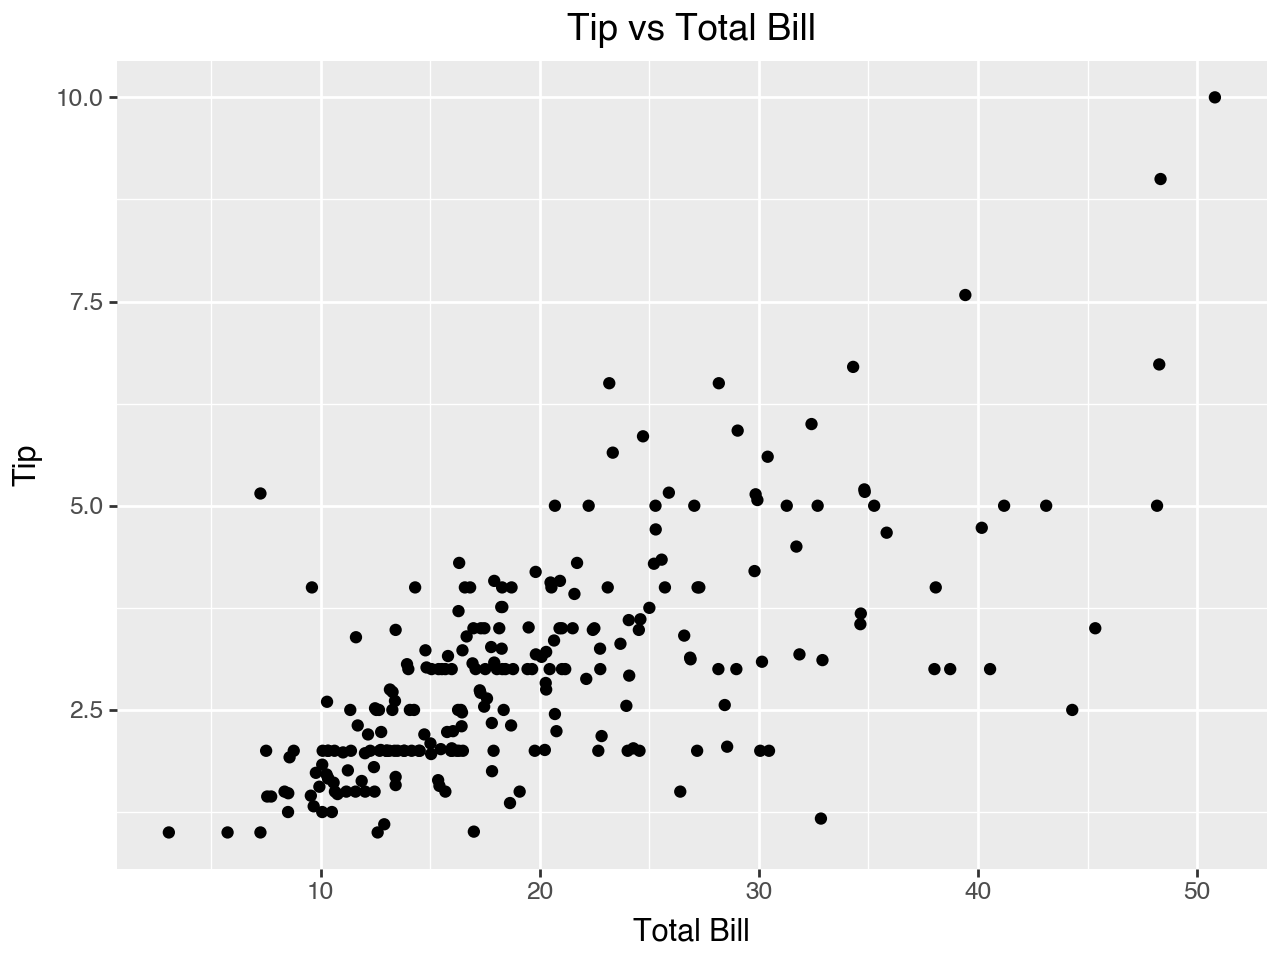

In [5]:
(
    ggplot(data = tips, mapping = aes(x='total_bill', y='tip'))
    + geom_point()
    + labs(
        x = 'Total Bill',
        y = 'Tip',
        title = 'Tip vs Total Bill'
    )
)

Within an `aes()` (short for "aesthetic"), in addition to mapping data to the x- and y-axes, we can also map data to other visual features such as size or color. In the scatterplot below we map color to the categorical variable `day` so that each day will use dots of a different color.

Note that when we do so a legend is automatically created for us. Within the `labs()` function we can specify the text for the legend label by using the parameter that corresponds to the aesthetic mapping. For example, in this plot we mapped color to the day of the week, so now we can specify a `color` parameter in the `labs()` function to provide the text label for the legend.

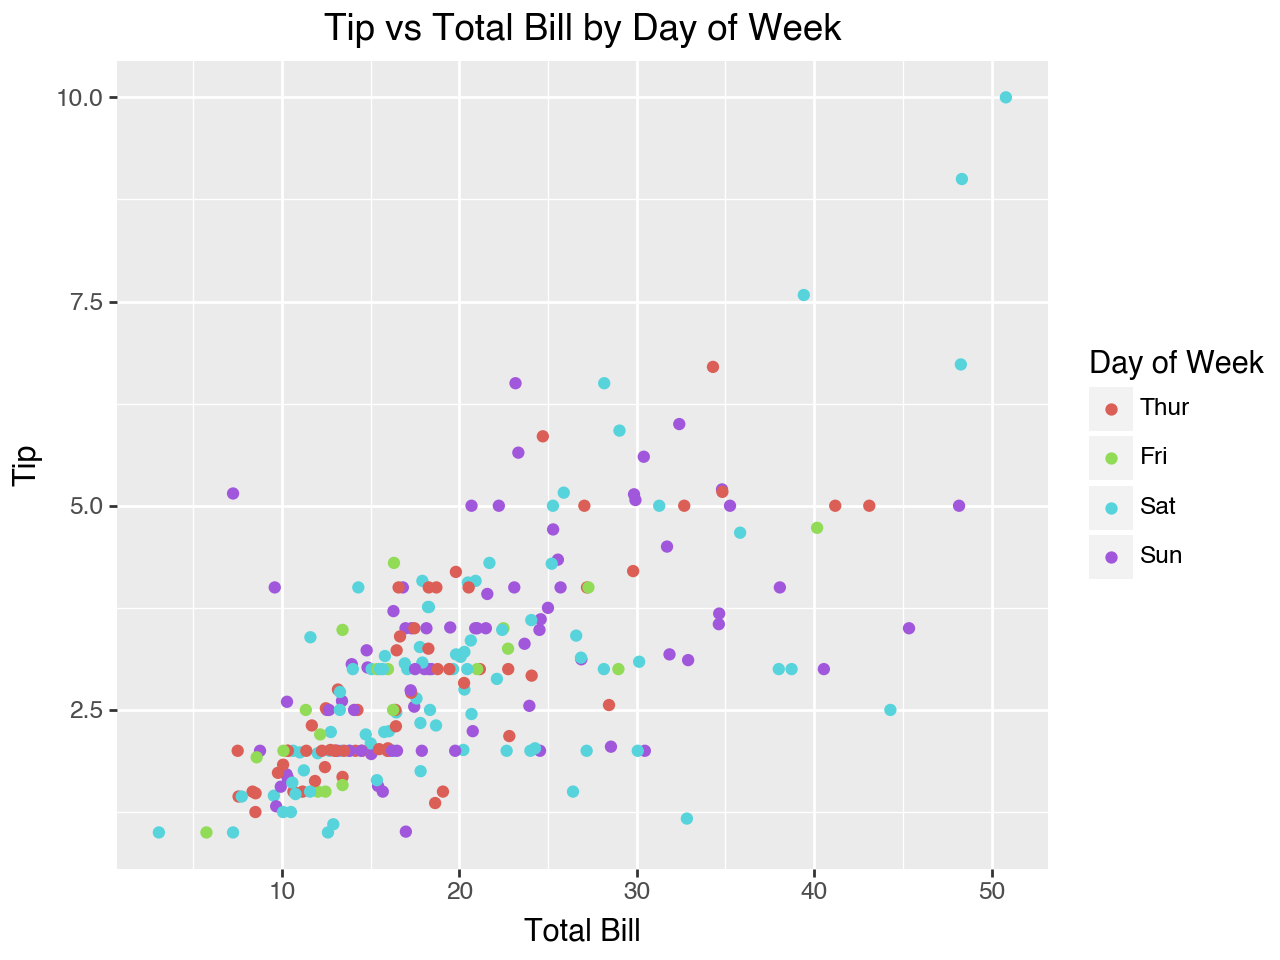

In [6]:
(
    ggplot(data = tips, mapping = aes(x='total_bill', y='tip', color = 'day'))
    + geom_point()
    + labs(
        x = 'Total Bill',
        y = 'Tip',
        title = 'Tip vs Total Bill by Day of Week',
        color = 'Day of Week'
    )
)

### Histograms
A histogram is used to show the distribution of a numeric variable. It works best for continuous numeric variables. For discrete numeric variables you need to pay attention to which sides of the bin intervals are open (endpoint not included in the interval) or closed (endpoint included in the interval).  

With histograms you should also be aware that changing the number of bins (or changing the binwidth, which has a similar effect) can change the message of the histogram. 

The heights of the bars of the histogram can be mapped to counts, normalized counts, or densities. We can also calculate the proportion with width * density.  The specific mapping may be specified using the `after_stat()` function of the y argument within `aes()`. The default mapping is count. Below are some definitions of the various mappings for the height of the bars in the histogram.

* **count** - Height of the bars is the count of observations in each bin
* **normalized count** - Height of the bars is shown as the count of observations in that bin as a proportion of the count of observations in the bin with the highest count of observations
* **density** - Scaled so that the area under the bars is 1
* **proportion** - The proportion of observations in each bin

Below we use `geom_histogram()` to make a histogram showing the distribution of `total_bill` from the `tips` DataFrame. Within `geom_histogram()` the color of the bars is determined by the `fill` parameter. Below we set the fill to steel blue. This histogram uses the default 'count' visualization.

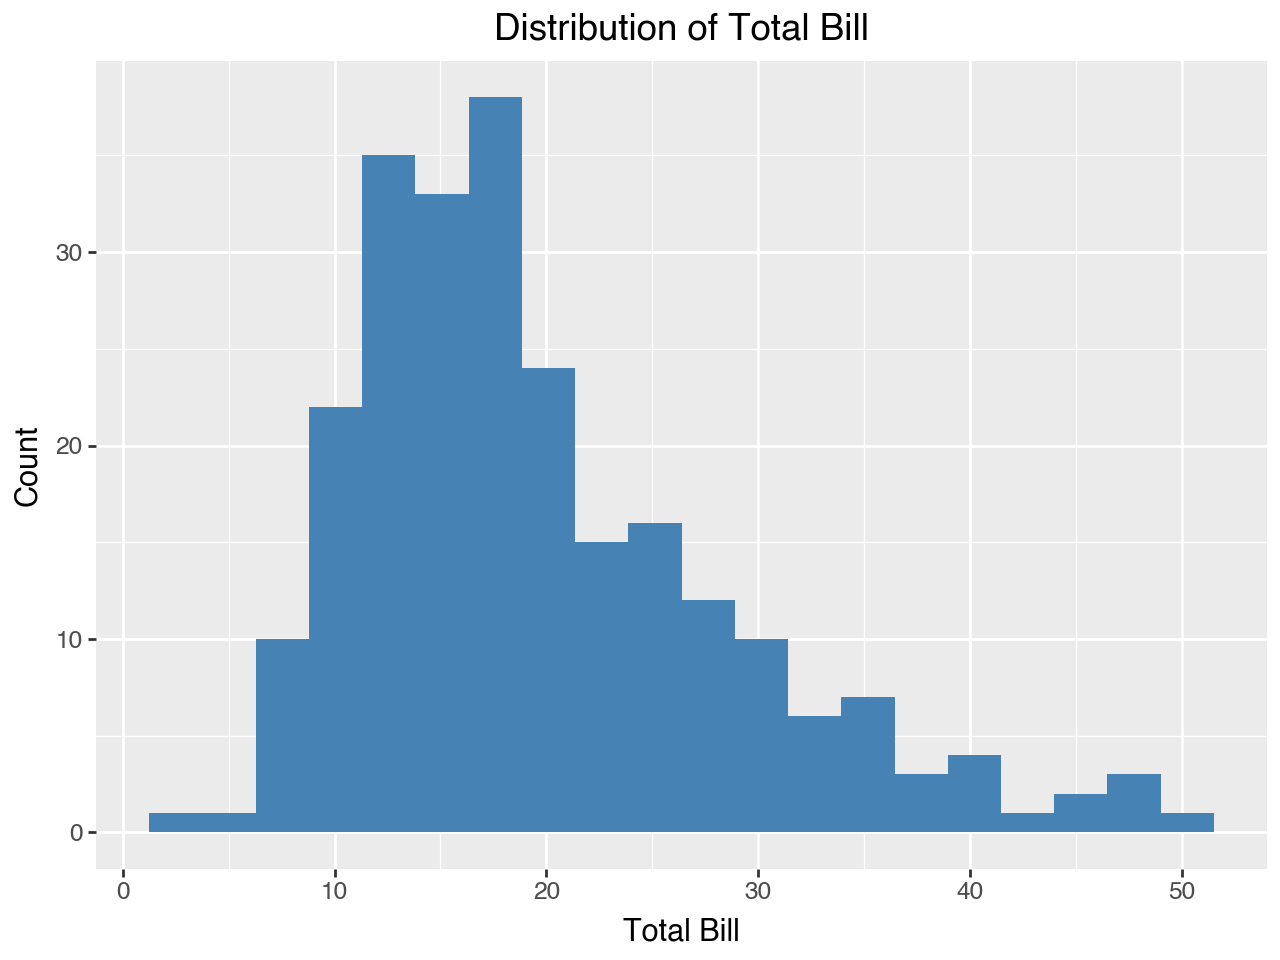

In [7]:
(
    ggplot(data = tips, mapping = aes(x = 'total_bill'))
    + geom_histogram(bins = 20, fill = 'steelblue')   # could set binwidth instead
    + labs(
        title = 'Distribution of Total Bill',
        x = 'Total Bill',
        y = 'Count'
    )
)

Next, we show a histogram that uses density for the height of the bars. The only changes from the histogram above are the addition of `y = after_stat(density)` to `aes()` in the mapping and changing the y-axis label.

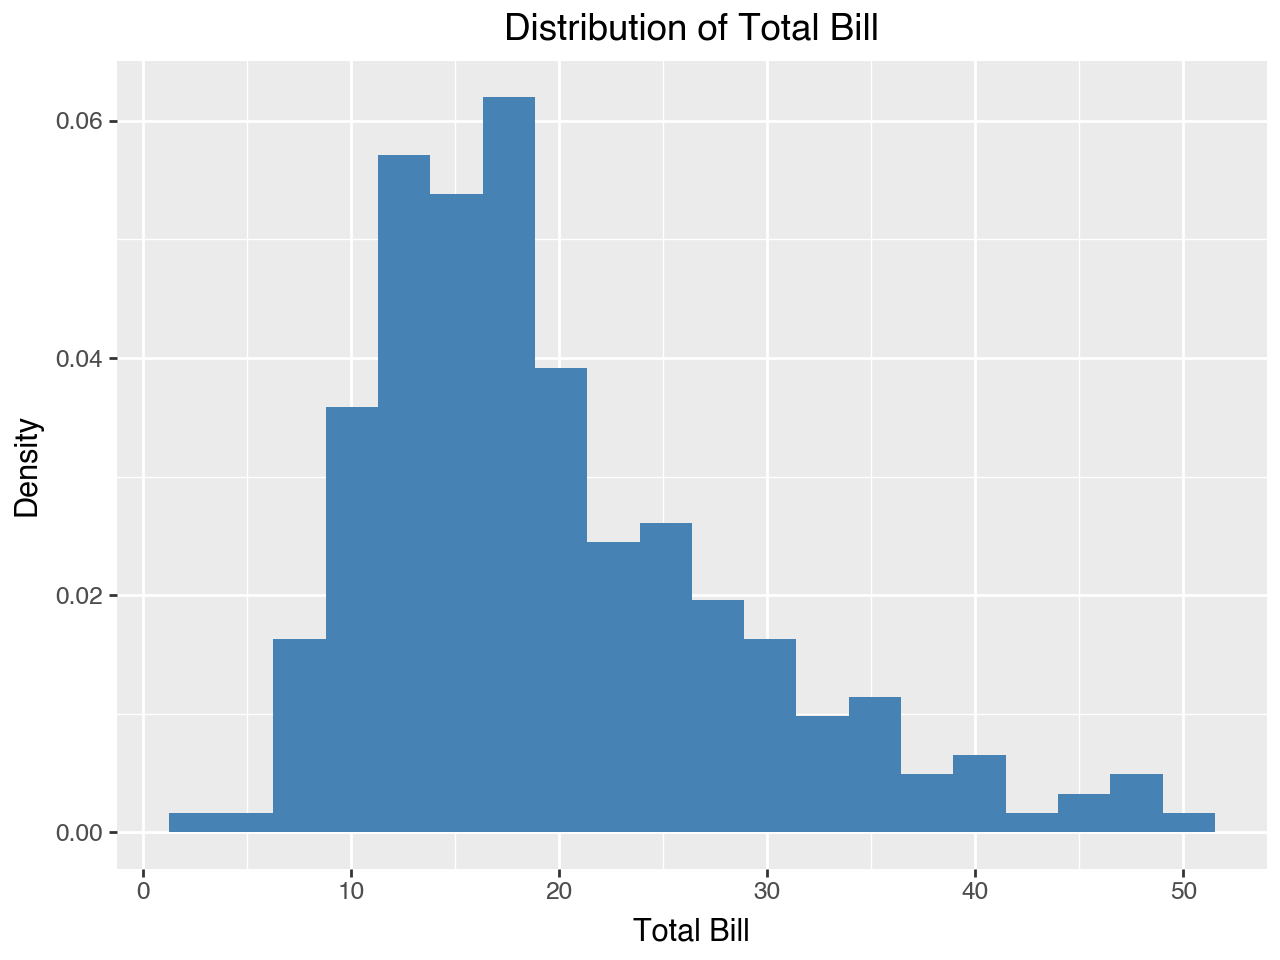

In [8]:
(
    ggplot(data = tips, mapping = aes(x = 'total_bill', y = after_stat('density')))
    + geom_histogram(bins = 20, fill = 'steelblue')   # could set binwidth instead
    + labs(
        title = 'Distribution of Total Bill',
        x = 'Total Bill',
        y = 'Density'
    )
)

Next, we show the same histogram with the height of the bars representing proportion. We do this by multiplying width and density for the `after_stat()` within the `aes()` function.

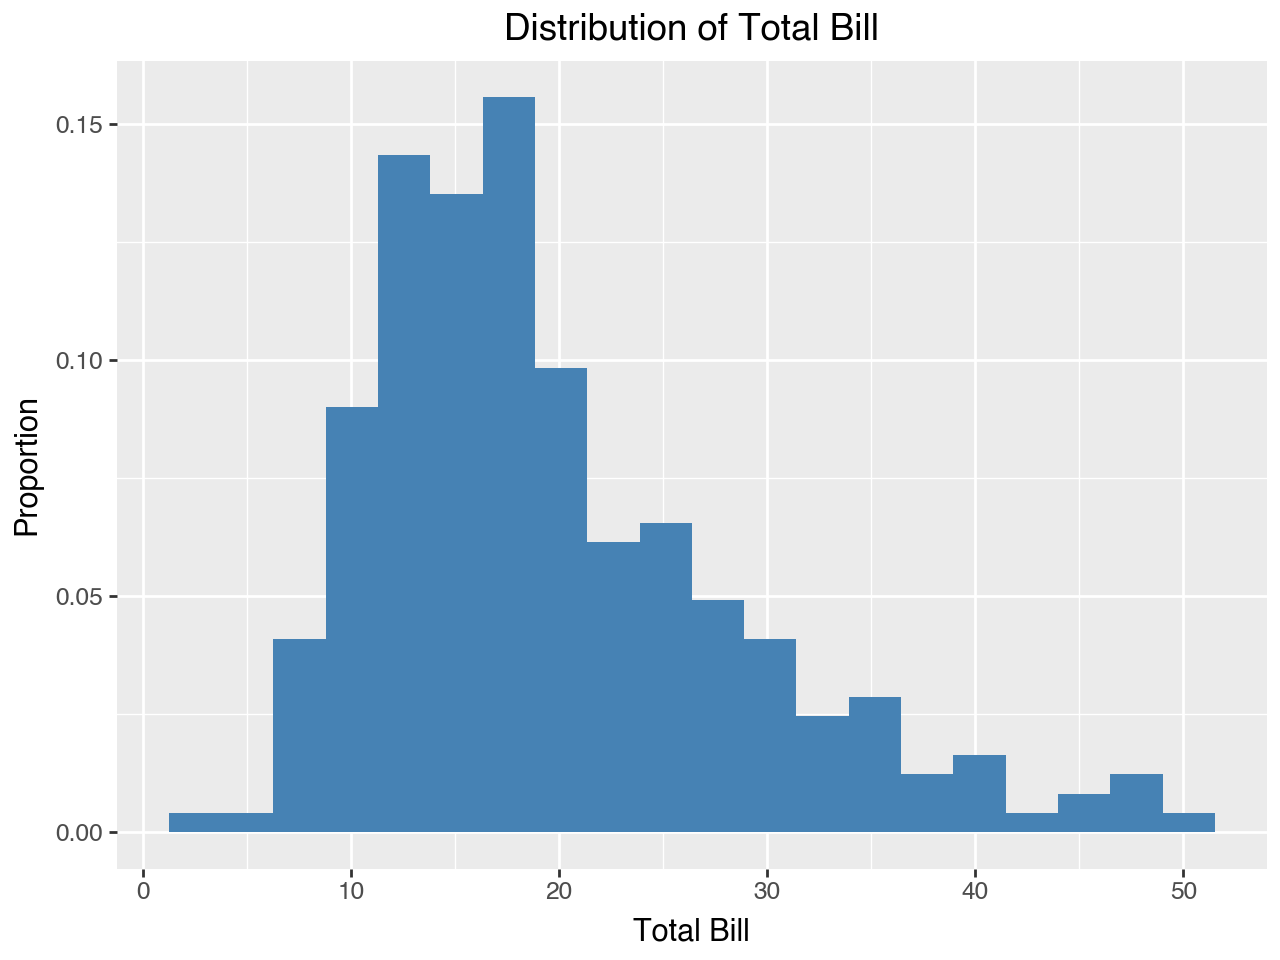

In [9]:
(
    ggplot(data = tips, mapping = aes(x = 'total_bill', y = after_stat('width*density')))
    + geom_histogram(bins = 20, fill = 'steelblue')   # could set binwidth instead
    + labs(
        title = 'Distribution of Total Bill',
        x = 'Total Bill',
        y = 'Proportion'
    )
)

### Density Plots
A density plot, like a histogram, is used to show the distribution of a numeric variable. It is like what we would have if we made a histogram with thousands of bins and then connected the tops of each bin with a line.

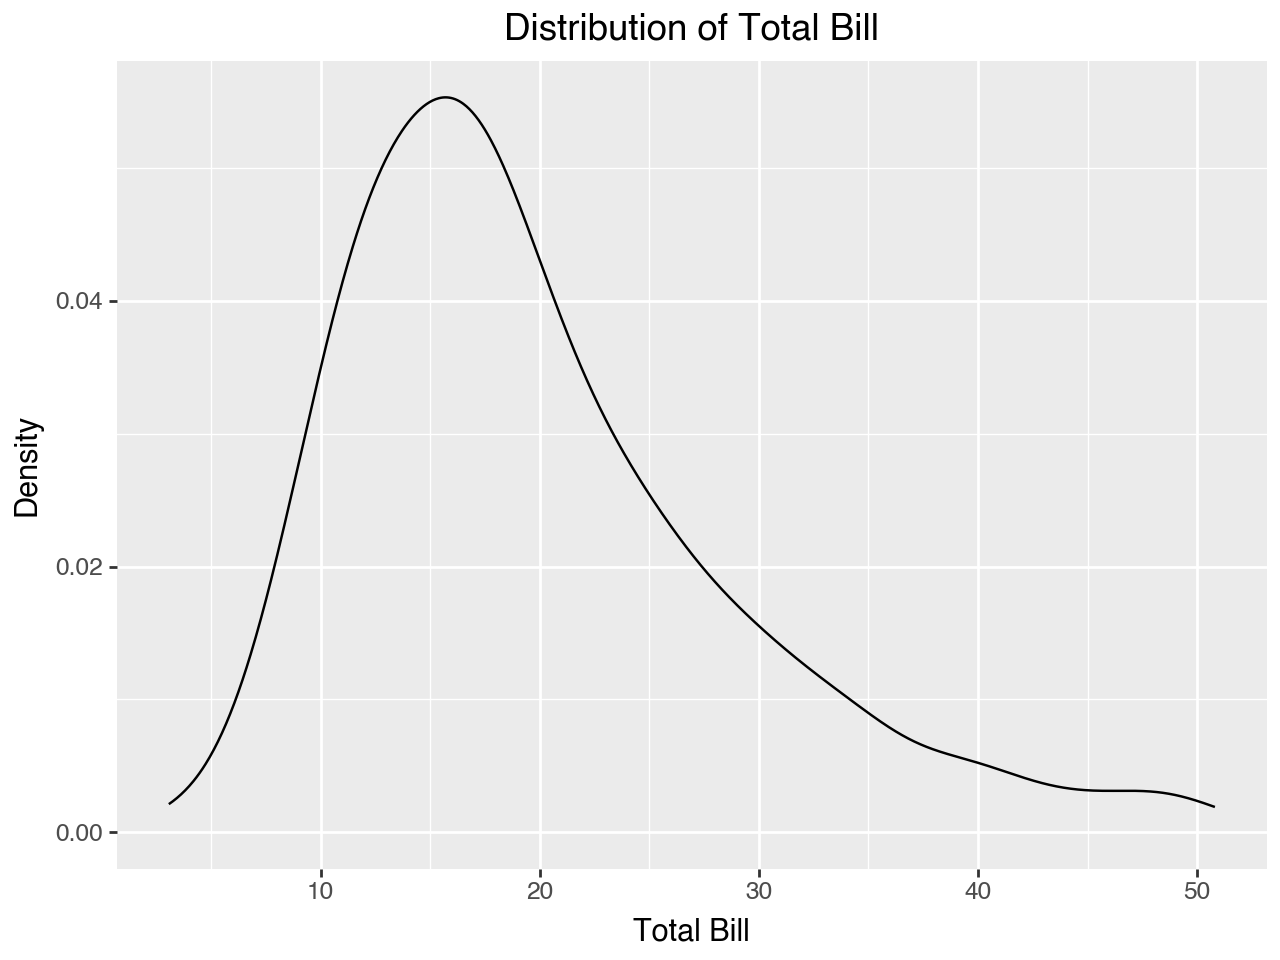

In [10]:
(
    ggplot(data = tips, mapping = aes(x = 'total_bill'))
    + geom_density()
    + labs(
        title = 'Distribution of Total Bill',
        x = 'Total Bill',
        y = 'Density'
    )
)

One of the primary advantages of plotnine is that plots are built element-by-element in layers, so we can easily combine different elements to create the plot we want. Below we add a density plot to a histogram. Note that to keep the two plots on the same scale for the y-axis we need to use 'density' for the `after_stat()` on the histogram. We add the density curve to the histogram by simply adding a `geom_density()` to the plot. Within `geom_density()` we can set the color and size (width) of the density curve.

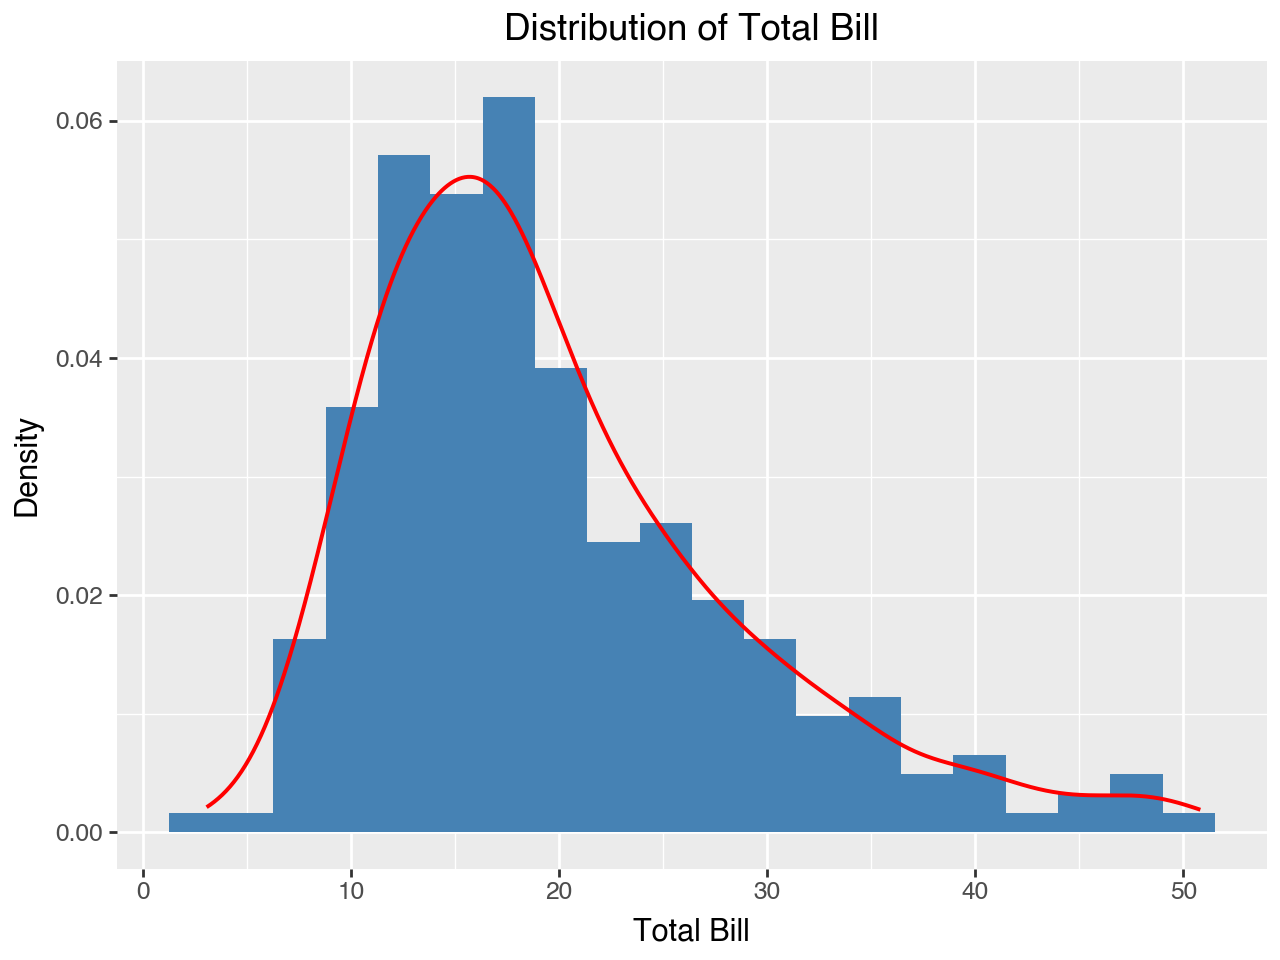

In [11]:
(
    ggplot(data = tips, mapping = aes(x = 'total_bill', y = after_stat('density')))
    + geom_histogram(bins = 20, fill = 'steelblue')   # could set binwidth instead
    + geom_density(color = 'red', size = 0.8)
    + labs(
        title = 'Distribution of Total Bill',
        x = 'Total Bill',
        y = 'Density'
    )
)

### Boxplots

A boxplot is used to show the distribution of a single numeric variable. It shows the median, the 25th and 75th percentiles, and helps to identify outliers, typically shown as dots on the box plot. The dots are added for observations that are more than 1.5 interquartile ranges (difference between the 25th and 75th percentile values) from the top (75th percentile) or bottom (25th percentile) of the box.  

Below we use the `geom_boxplot()` function to create a basic boxplot showing the distribution of `total_bill` from the `tips` DataFrame. The `scale_x_continuous()` function is used to suppress the ticks ("breaks") and labels on the x-axis by setting them to `None`, since they are meaningless in the context of this boxplot.

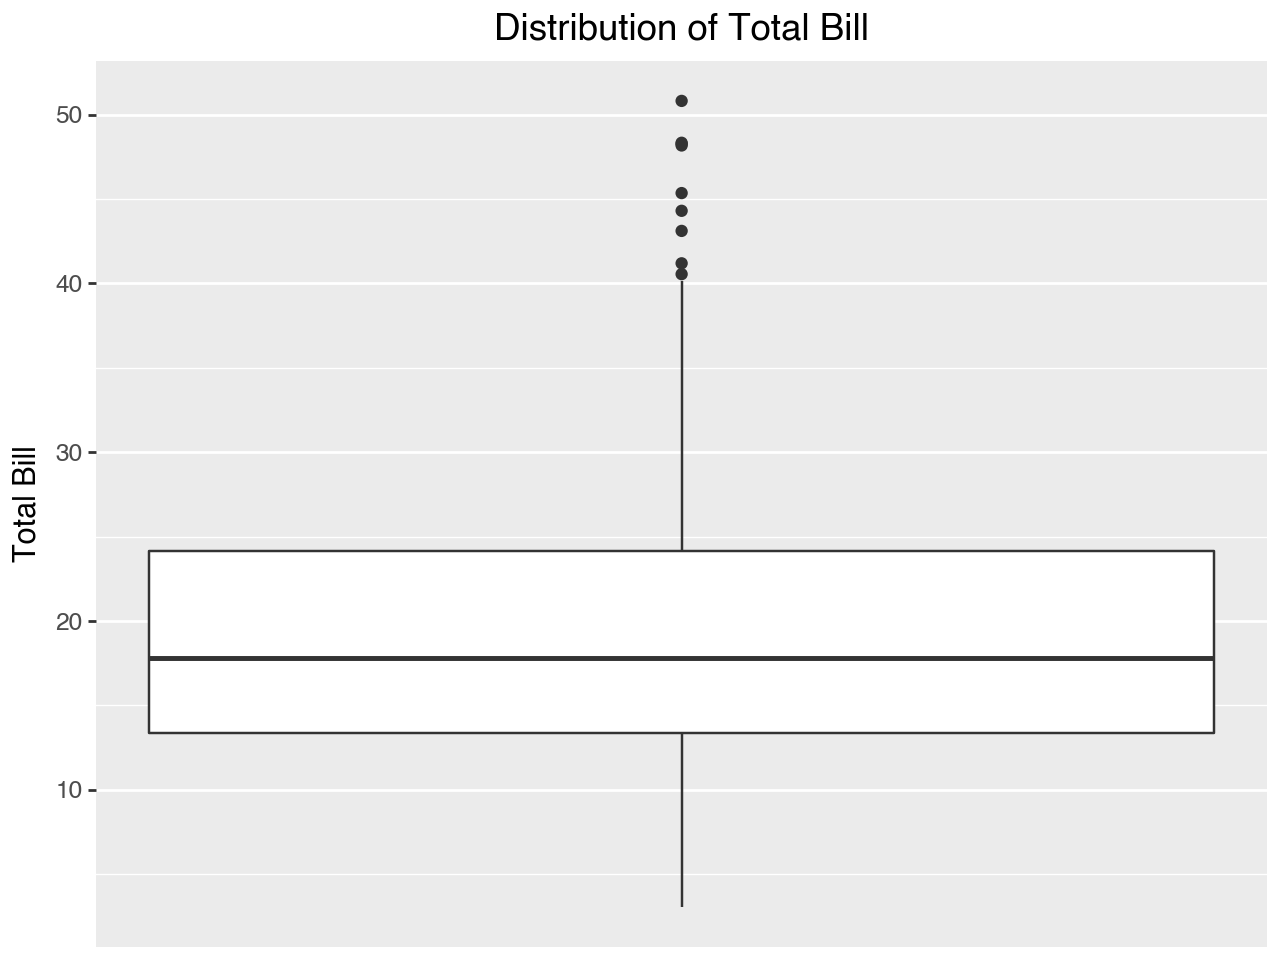

In [12]:
(
    ggplot(data = tips, mapping = aes(y = 'total_bill'))
    + geom_boxplot()
    + scale_x_continuous(labels = None, breaks = None)
    + labs(
        title = 'Distribution of Total Bill',
        y = 'Total Bill'
    )
)

While a boxplot may be used to visualize the distribution of a single numeric variable, as in the plot above, where it really shines is in the visualization of a numeric variable and categorical variable combination. For example, the plot below shows the distribution of the total bill by day of the week, with a separate boxplot for each day of the week.  

Note that the within the `aes()` function the x-axis is mapped to `factor(day)` instead of `day`. This is not strictly necessary here, since the `day` column in `tips` is already a categorical type, but if it was some other type it helps to convert it to a factor with the `factor()` function within `aes()`.

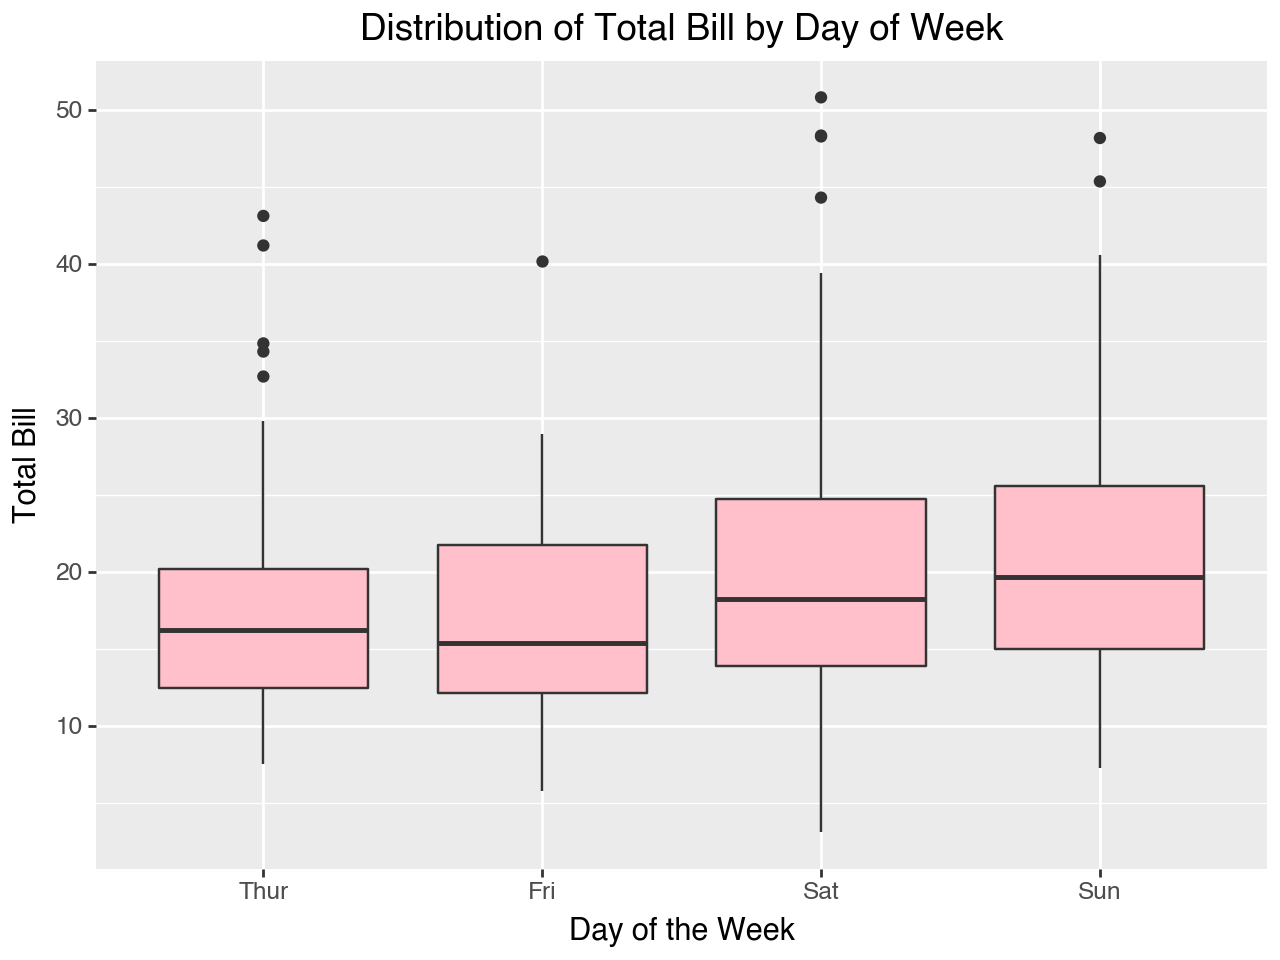

In [13]:
(
    ggplot(data = tips, mapping = aes(x = 'factor(day)', y = 'total_bill'))
    + geom_boxplot(fill = 'pink')
    + labs(
        title = 'Distribution of Total Bill by Day of Week',
        x = 'Day of the Week',
        y = 'Total Bill'
    )
)

### Simple Barplots

A barplot is useful for showing counts or proportions of values of a categorical variable. For example, in the tips data `sex` is a categorical variable. The barplot below shows counts of observations for each sex.

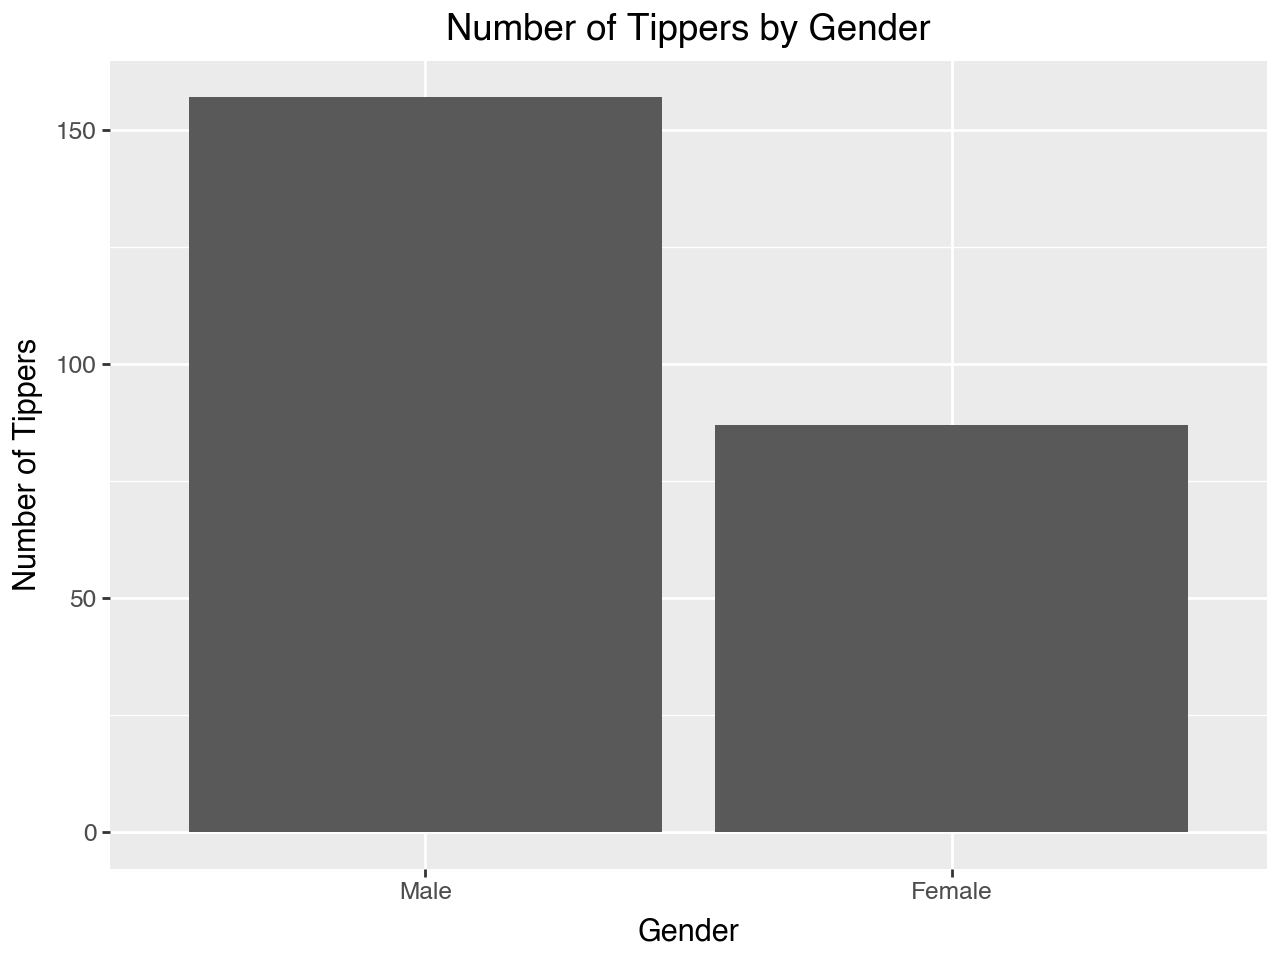

In [14]:
(
    ggplot(data = tips, mapping = aes(x = 'sex'))
    + geom_bar()
    + labs(
        title = 'Number of Tippers by Gender',
        x = 'Gender',
        y = 'Number of Tippers'
    )
)

To have the height of the bars represent proportions we can map the y variable to `after_stat('count/sum(count)')`. This means that for each bar the count is divided by the sum of the counts for all the bars, yielding the proportion.

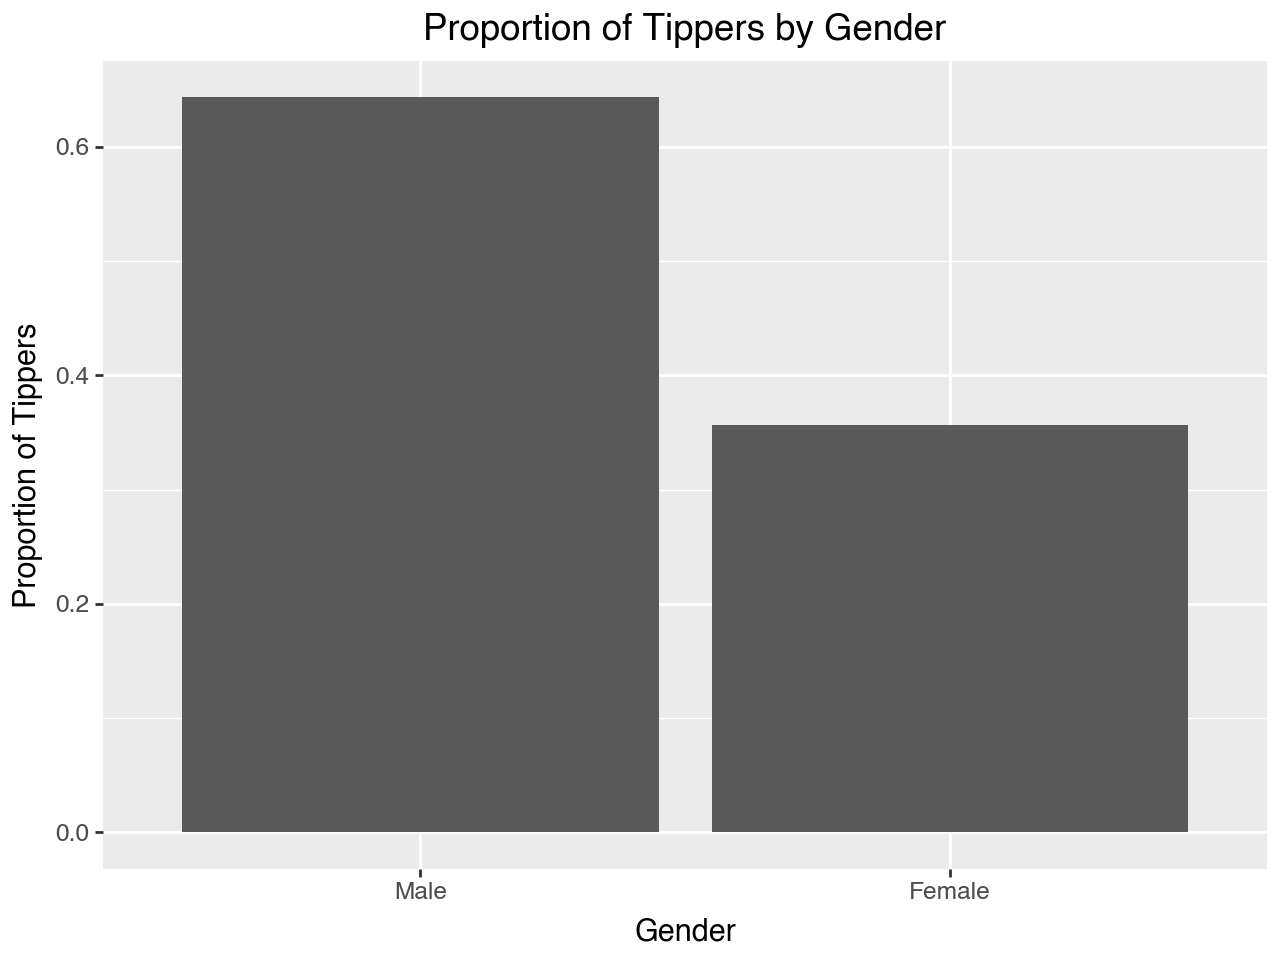

In [15]:
(
    ggplot(data = tips, mapping = aes(x = 'sex', y = after_stat('count/sum(count)')))
    + geom_bar()
    + labs(
        title = 'Proportion of Tippers by Gender',
        x = 'Gender',
        y = 'Proportion of Tippers'
    )
)

### Barplots Depicting Means

The examples of barplots we have seen so far depict counts or proportions of a categorical variable. Sometimes, however, we want a different kind of barplot, such as a barplot to show means. The plot below shows mean total bill for each day of the week. To make the plot we map x to `day` and y to `total_bill`. The default stat for `geom_bar()`, which is `'count`, can't be used when there is a variable mapped to y, so we need to use `stat = 'summary'` within `geom_bar()`. This stat defaults to calculating the mean, so the height of the bars represents the mean total bill for each of the days.

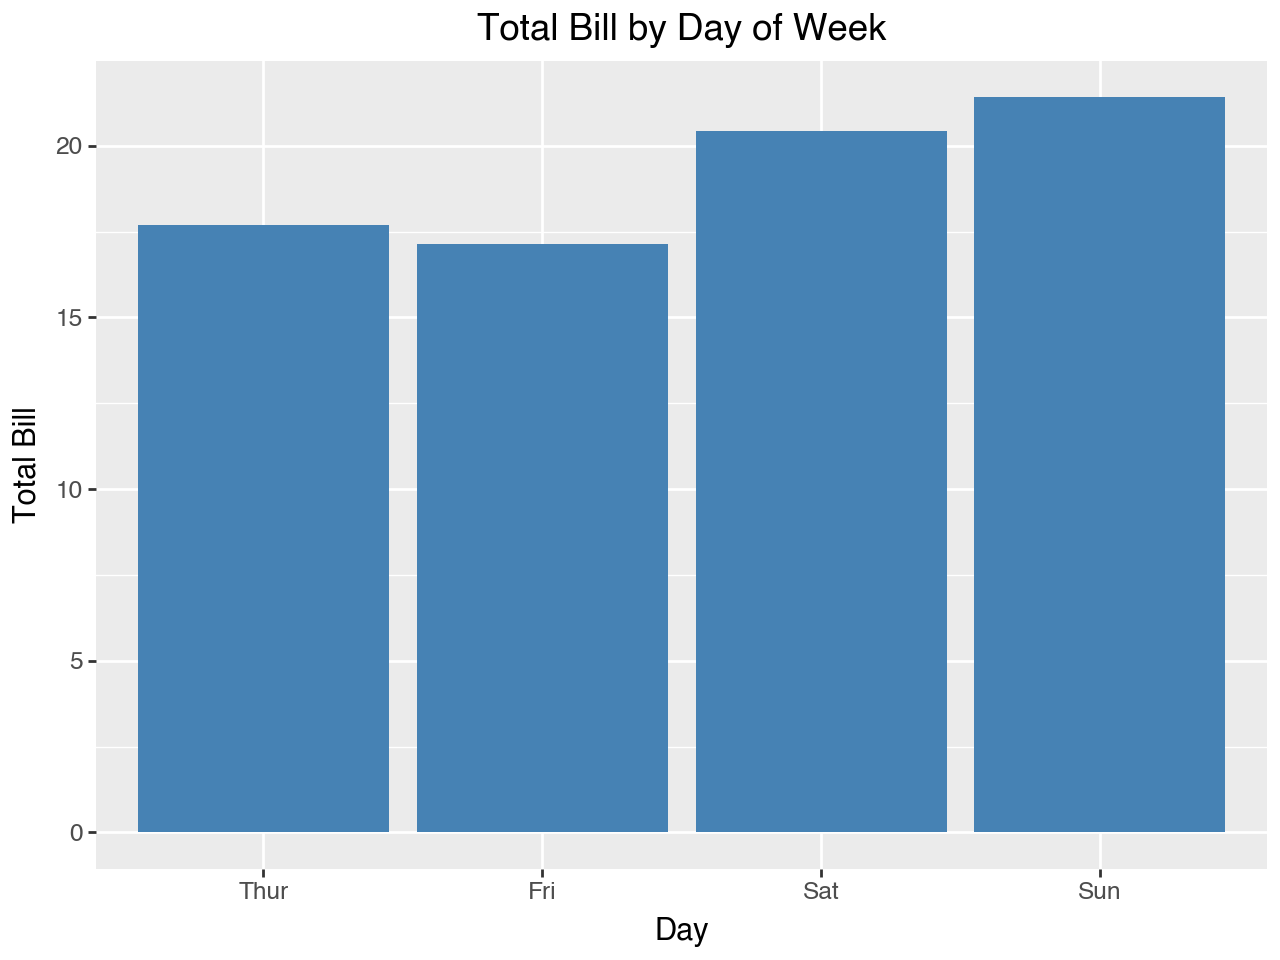

In [16]:
(
    ggplot(data = tips, mapping = aes(x = 'day', y = 'total_bill'))
    + geom_bar(stat = 'summary', fill = 'steelblue')
    + labs(
        title = 'Total Bill by Day of Week',
        x = 'Day',
        y = 'Total Bill'
    )
)

To get some idea of how much confidence we should have in the pattern of means depicted we can add `stat_summary()` to the plot. This adds a point and line for each day of the week. The point is added at the mean, and the line represents the 95% confidence interval for the mean. These are sometimes referred to as "error bars." The mean and the confidence interval for the error bars are derived from bootstrapping, so there is no assumption about the underlying distribution.  

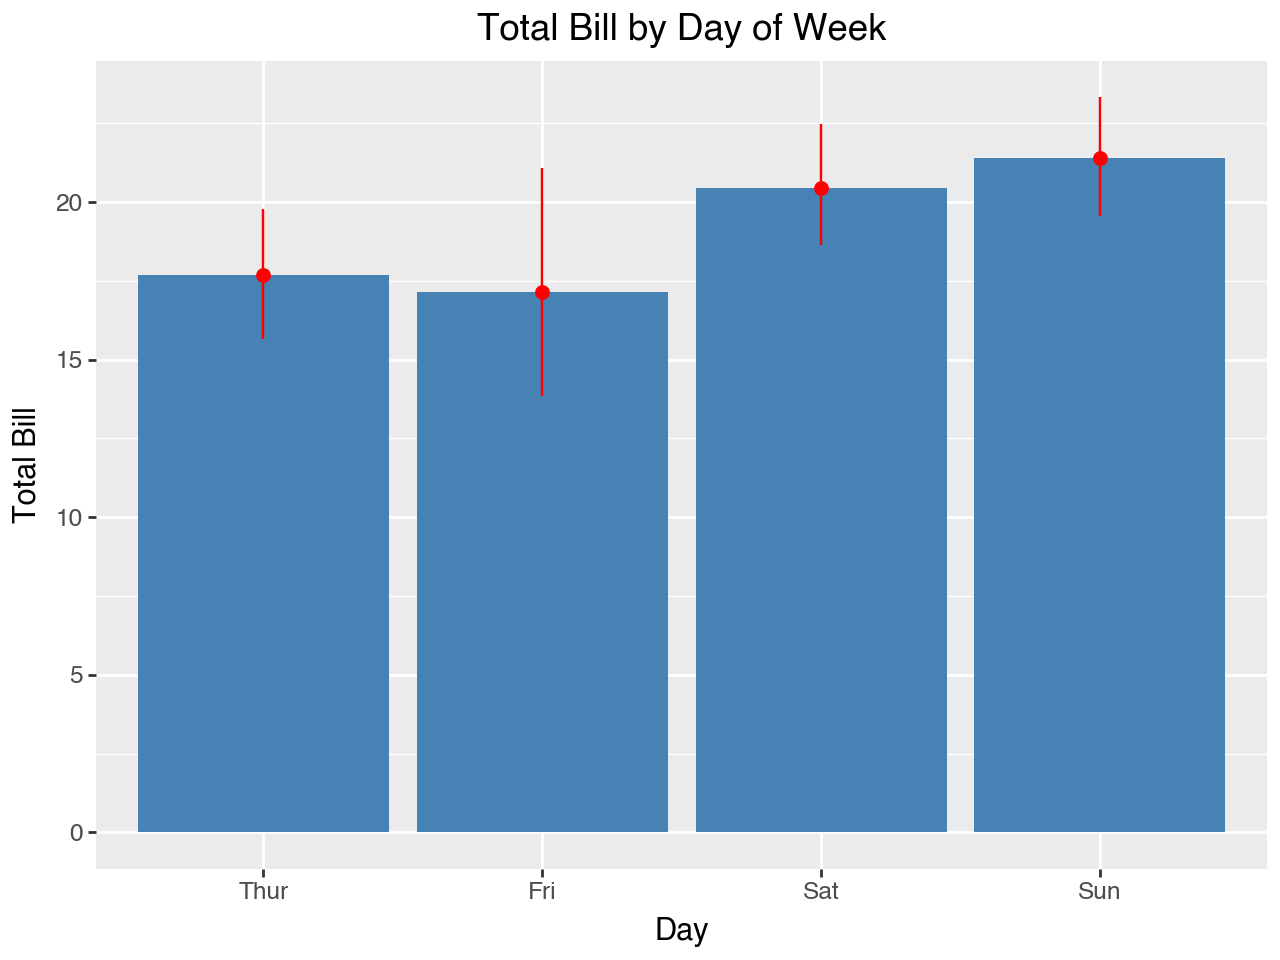

In [17]:
(
    ggplot(data = tips, mapping = aes(x = 'day', y = 'total_bill'))
    + geom_bar(stat = 'summary', fill = 'steelblue')
    + stat_summary(color = 'red')
    + labs(
        title = 'Total Bill by Day of Week',
        x = 'Day',
        y = 'Total Bill'
    )
)

We see that the confidence interval is wider for Friday. That would suggest that Friday has fewer observations and/or a higher standard deviation. Let's take a look to see.

In [18]:
tips.groupby('day', observed = True)[['total_bill']].agg(['count', 'std'])

total_bill          
          count       std
day                      
Thur         62  7.886170
Fri          19  8.302660
Sat          87  9.480419
Sun          76  8.832122

### Side-by-Side Barplots

A side-by-side barplot is used to show counts or proportions of a categorical variable according to another categorical variable. For example, the plot below shows counts of tippers by day of the week, according to their gender. The counts are shown by separate bars that are beside each other. 

* Separate colors for each gender indicated by the `fill = 'sex'` mapping within `aes()`
* The separate bars (fill colors) are shown beside of each other because of the `fill = 'dodge'` parameter set within `geom_bar()`
* Note how the legend title is set within the `labs()` function with the `fill` keyword, because `fill` is the aesthetic that was mapped within `aes()`.

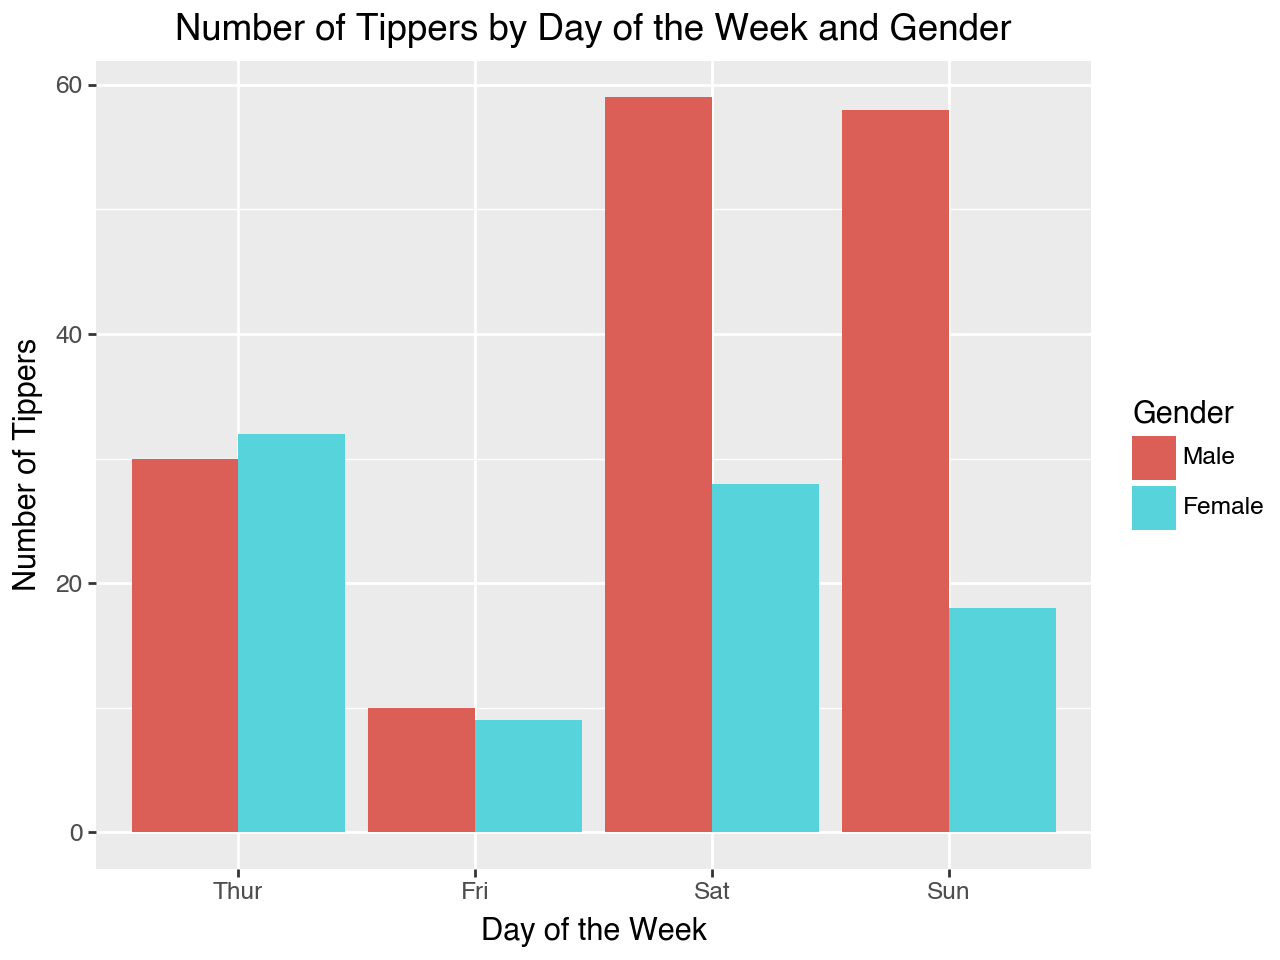

In [19]:
(
    ggplot(data = tips, mapping = aes(x = 'day', fill = 'sex'))
    + geom_bar(position = 'dodge')
    + labs(
        title = 'Number of Tippers by Day of the Week and Gender',
        x = 'Day of the Week',
        y = 'Number of Tippers',
        fill = 'Gender'
    )
)

### Stacked Barplots

A stacked barplot, like a side-by-side barplot, is used to show counts or percentages of a categorical variable according to another categorical variable. However, instead of having separate bars to distinguish values of one of the categorical variables their bars are stacked. Stacking the bars instead of placing them side-by-side is accomplished by setting the `position = 'stack'` parameter within `geom_bar()`.

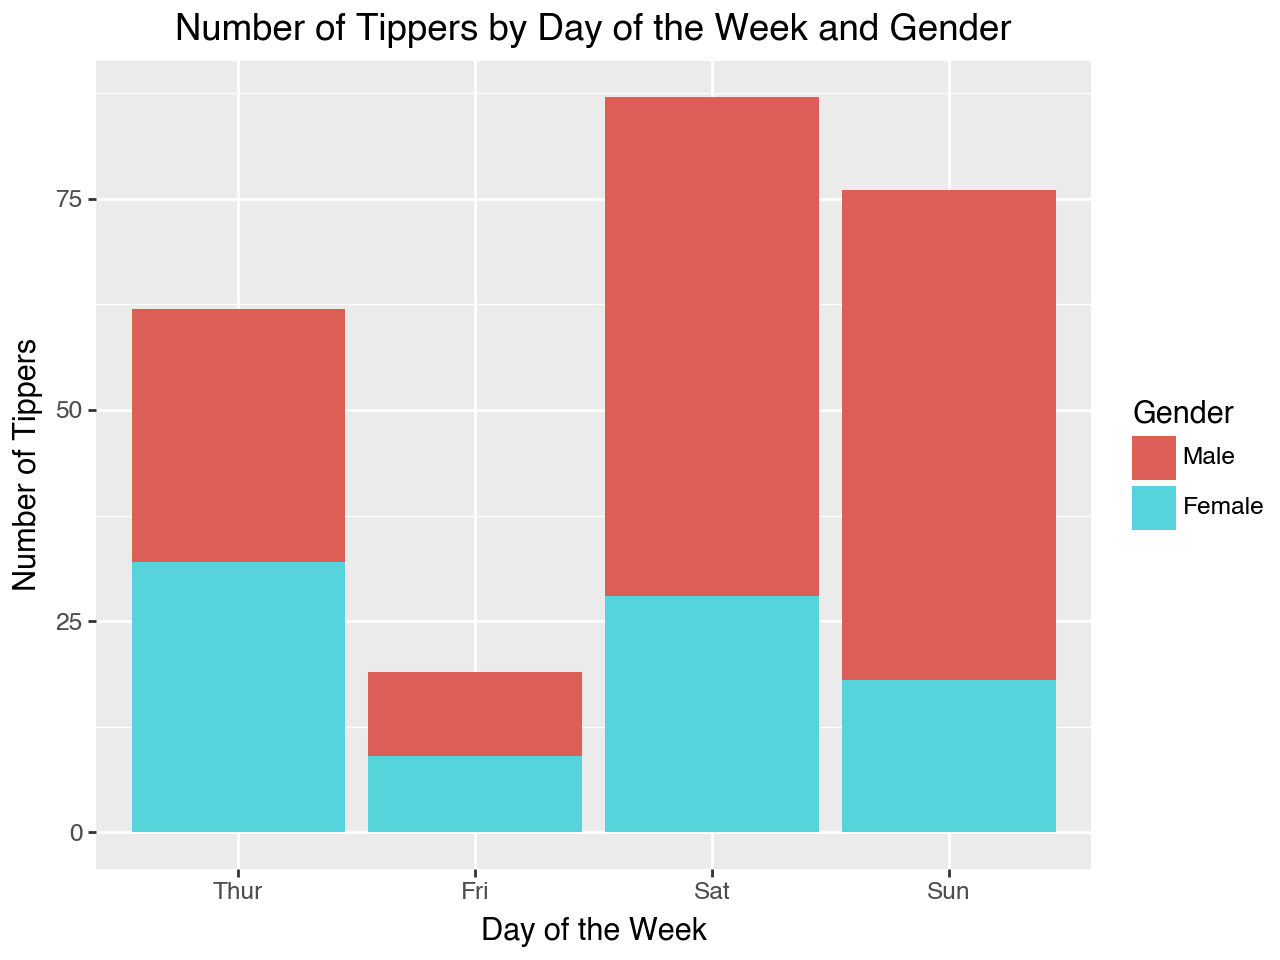

In [20]:
(
    ggplot(data = tips, mapping = aes(x = 'day', fill = 'sex'))
    + geom_bar(position = 'stack')
    + labs(
        title = 'Number of Tippers by Day of the Week and Gender',
        x = 'Day of the Week',
        y = 'Number of Tippers',
        fill = 'Gender'
    )
)

### Standardized Stacked Barplots

A standardized stacked barplot (or 'percent stacked barplot') is a stacked barplot that shows the proportions of each value of the categorical variable that the bar regions represent, rather than counts. Since each bar's regions add up to 100% each bar is the same height. This makes it easier to directly compare the relative proportions between the values of the other categorical variable. For example, the plot below makes it easy to compare the proportions of male and female tippers across the days of the week.  

We use `position = 'fill'` within `geom_bar()` to cause the bars to be stacked as proportions.

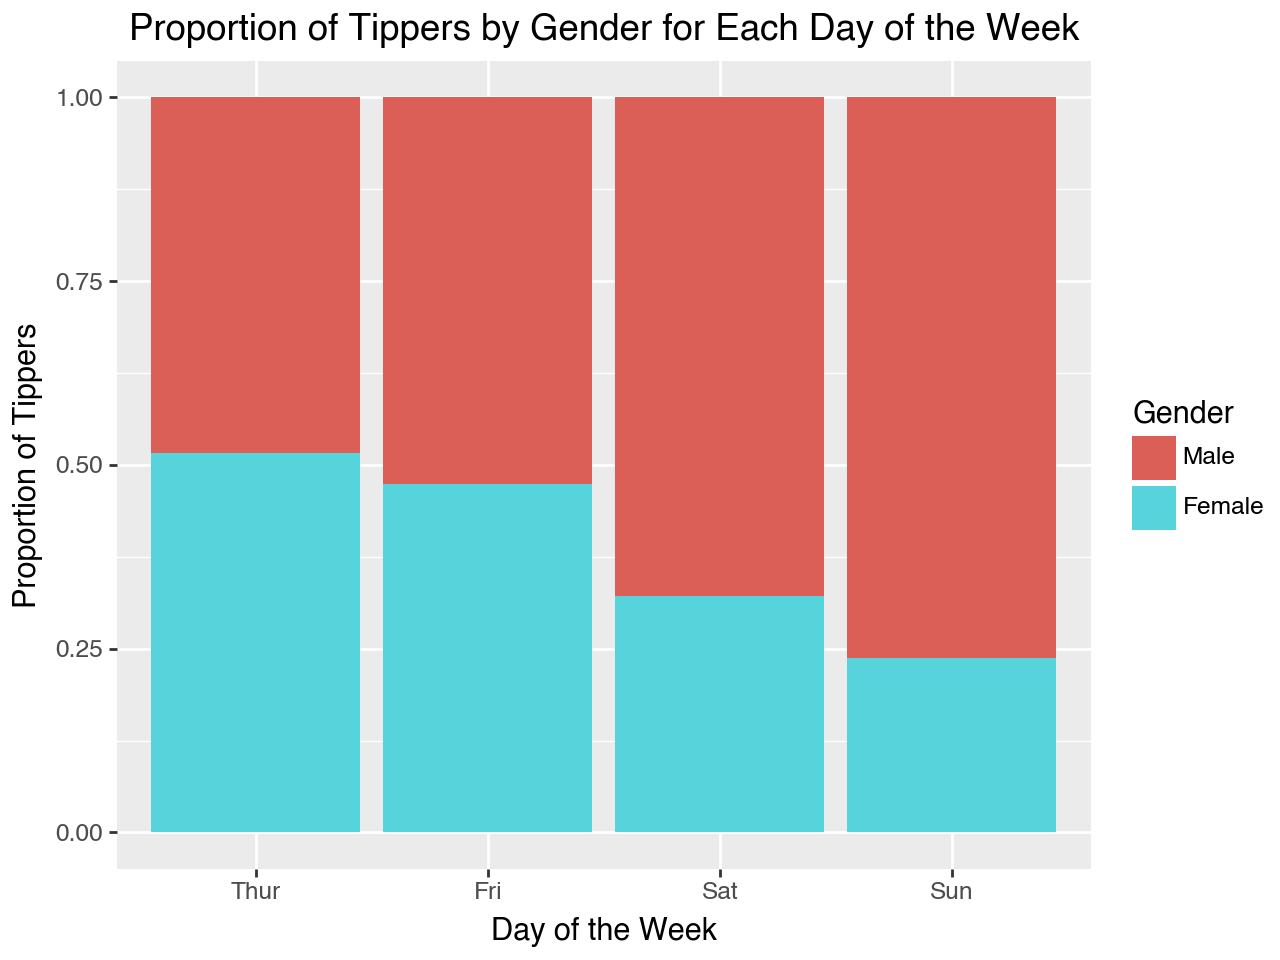

In [21]:
(
    ggplot(data = tips, mapping = aes(x = 'day', fill = 'sex'))
    + geom_bar(position = 'fill')
    + labs(
        title = 'Proportion of Tippers by Gender for Each Day of the Week',
        x = 'Day of the Week',
        y = 'Proportion of Tippers',
        fill = 'Gender'
    )
)

It is useful to point out again that, besides axis labels and titles, the only difference between the three types of barplot shown above is the `position` parameter within `geom_bar()`. It is set to `dodge` for a side-by-side barplot, `stack` for a stacked barplot, and `fill` for a standardized stacked barplot.

### Lollipop Plots

A lollipop plot is like a barplot, but it emphasizes the specific value being plotted. Below we will load a new seaborn dataset, which has data on healthcare expenditures and life expectancy by year for six major countries from 1970 to 2020. Let's load and take a quick look at the data. 

In [22]:
health = sns.load_dataset('healthexp')
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


In [23]:
health.sample(5)

Year  Country  Spending_USD  Life_Expectancy
208  2010   Canada      4155.529             81.2
232  2014   Canada      4536.810             81.8
131  1997  Germany      2496.201             77.3
273  2020      USA     11859.179             77.0
129  1996      USA      4158.928             76.1

Next, we create lollipop plot with country on the y-axis and per capita expenditures on health care on the x-axis, for year 2020. We make a lollipop plot by adding `geom_point()` for the top of the lollipop, and then adding `geom_segment()` to create the lollipop stick.

This plot shows a lot of new features.

* Instead of using all the data in the `health` DataFrame we limit it to the data for the year 2020
* In the `aes()` function in the mapping we specify the order for the x axis as country ordered in reverse order of spending. The `reorder()` function may be used to re-order a categorical variable according to the values of a different variable, in this case `Spending_USD`. `Spending_USD` is multiplied by -1 to put it in reverse order. Note how the reorder function goes inside the quote marks. This is not something we are used to
* `geom_segment` adds line segments that go betweem two points. The first point is defined by the current values of x and y. The second point is defined by the values provided for the `xend` and `yend` parameters
* Plotnine plots automatically add the axes, breaks (ticks) and labels (ticklabels). To override them we can use the scale functions. Here we use `scale_y_continuous()`. In it we override the formatting of the ticklabels, adding a dollar sign before the numbers, a comma for the thousands separator, and a capital M (for Millions) at the end of the number. We use a lambda function and a list comprehension to format the existing labels

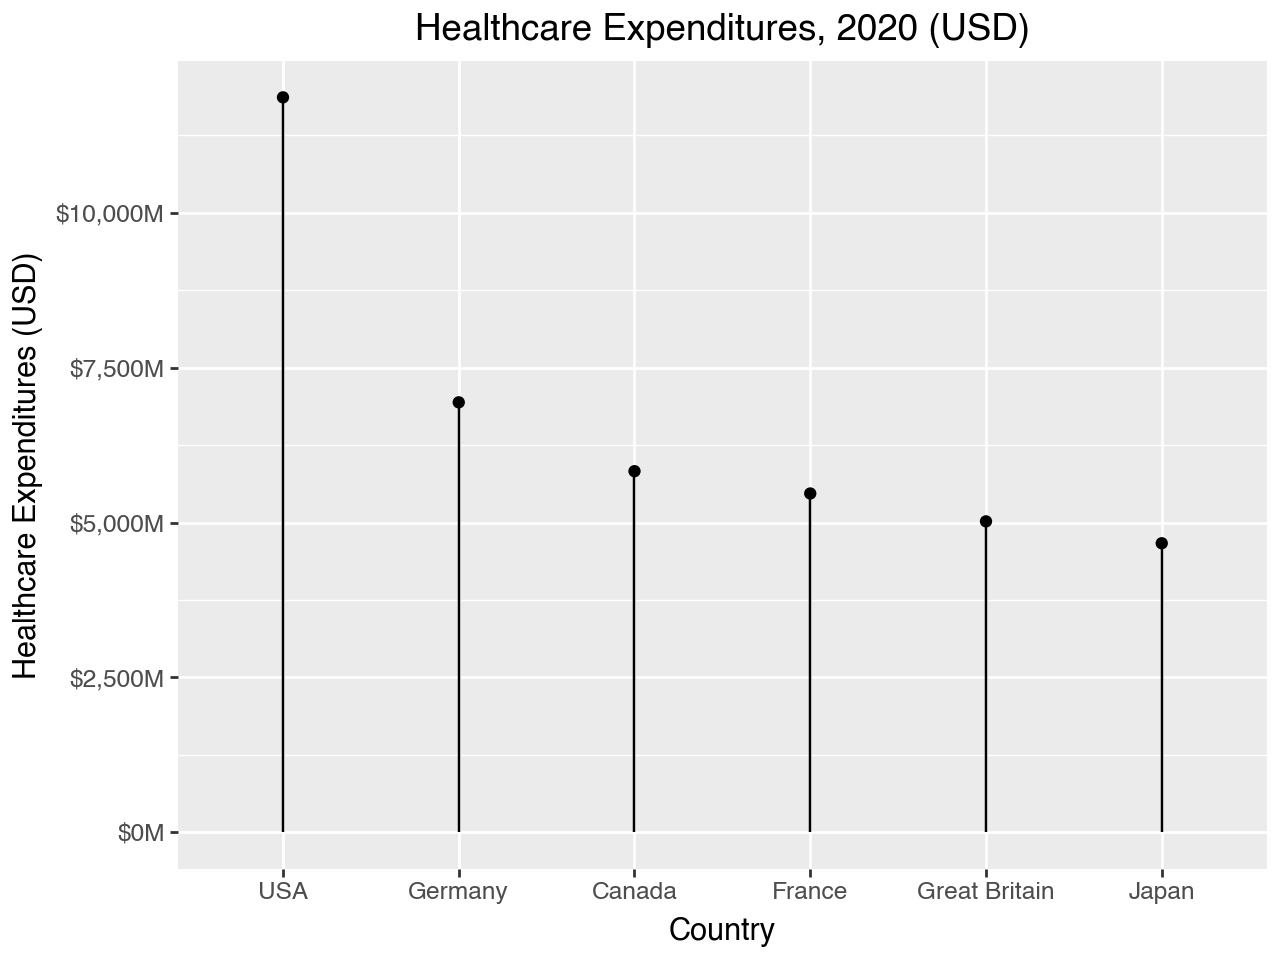

In [24]:
(ggplot(data = health.query('Year == 2020'), 
        mapping = aes(x = 'reorder(Country, -1*Spending_USD)', 
                      y = 'Spending_USD'))   
 + geom_point()
 + geom_segment(mapping = aes(xend = 'Country', yend = 0))
 + scale_y_continuous(labels = lambda l: ["${:,.0f}M".format(n) for n in l])
 + labs(
     title = 'Healthcare Expenditures, 2020 (USD)',
     x = 'Country',
     y = 'Healthcare Expenditures (USD)')
)

## Themes

Plotnine has several pre-defined themes that you can apply to your plots. You can also customize the themes, but here we will just try out a few of the pre-defined themes. The pre-defined themes you can apply are found [here](https://plotnine.org/reference/#themes) in the plotnine documentation. Below we apply a few different themes to the lollipop plot. First we assign the plot to a variable named `lollies`. We do this here to save space and to highlight that the theme is the only things that is changing in the plot code, but you can set these themes within the plot code in the same way as you would add any other function.

In [25]:
lollies = (ggplot(data = health.query('Year == 2020'), 
        mapping = aes(x = 'reorder(Country, -1*Spending_USD)', 
                      y = 'Spending_USD'))   
 + geom_point()
 + geom_segment(mapping = aes(xend = 'Country', yend = 0))
 + scale_y_continuous(labels = lambda l: ["${:,.0f}M".format(n) for n in l])
 + labs(
     title = 'Healthcare Expenditures, 2020 (USD)',
     x = 'Country',
     y = 'Healthcare Expenditures (USD)')
)

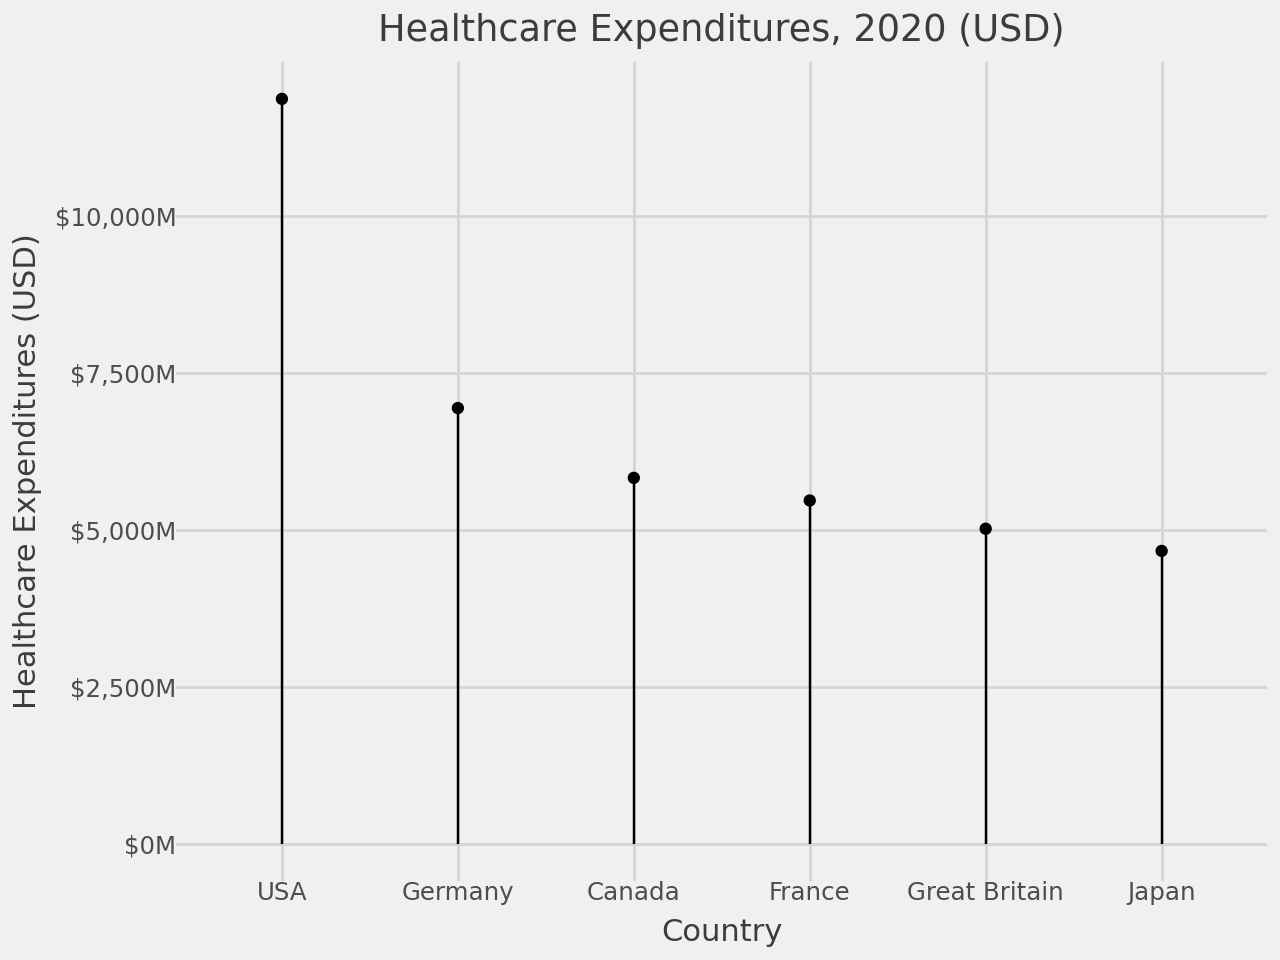

In [26]:
lollies + theme_538()

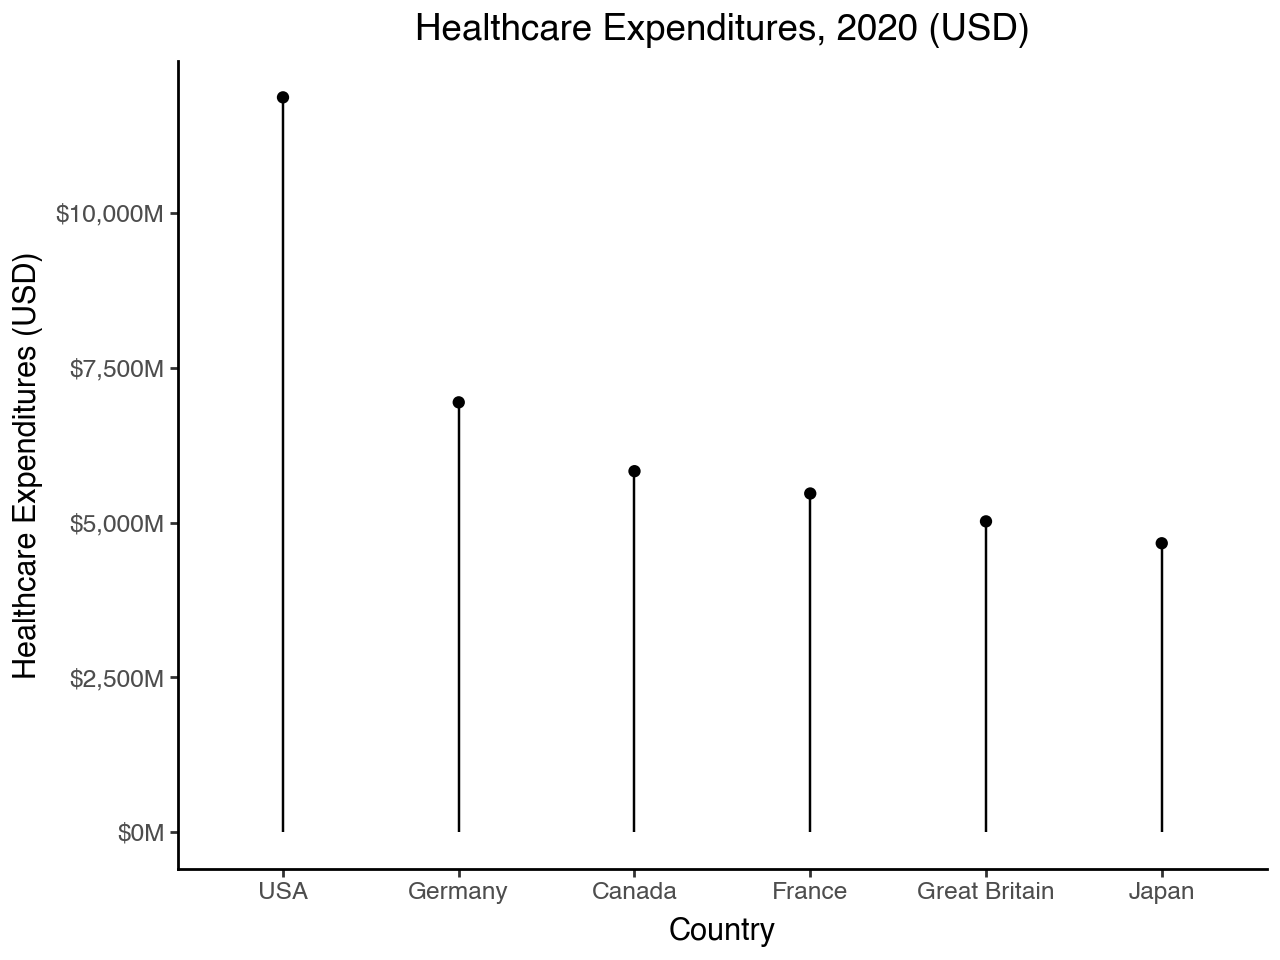

In [27]:
lollies + theme_classic()

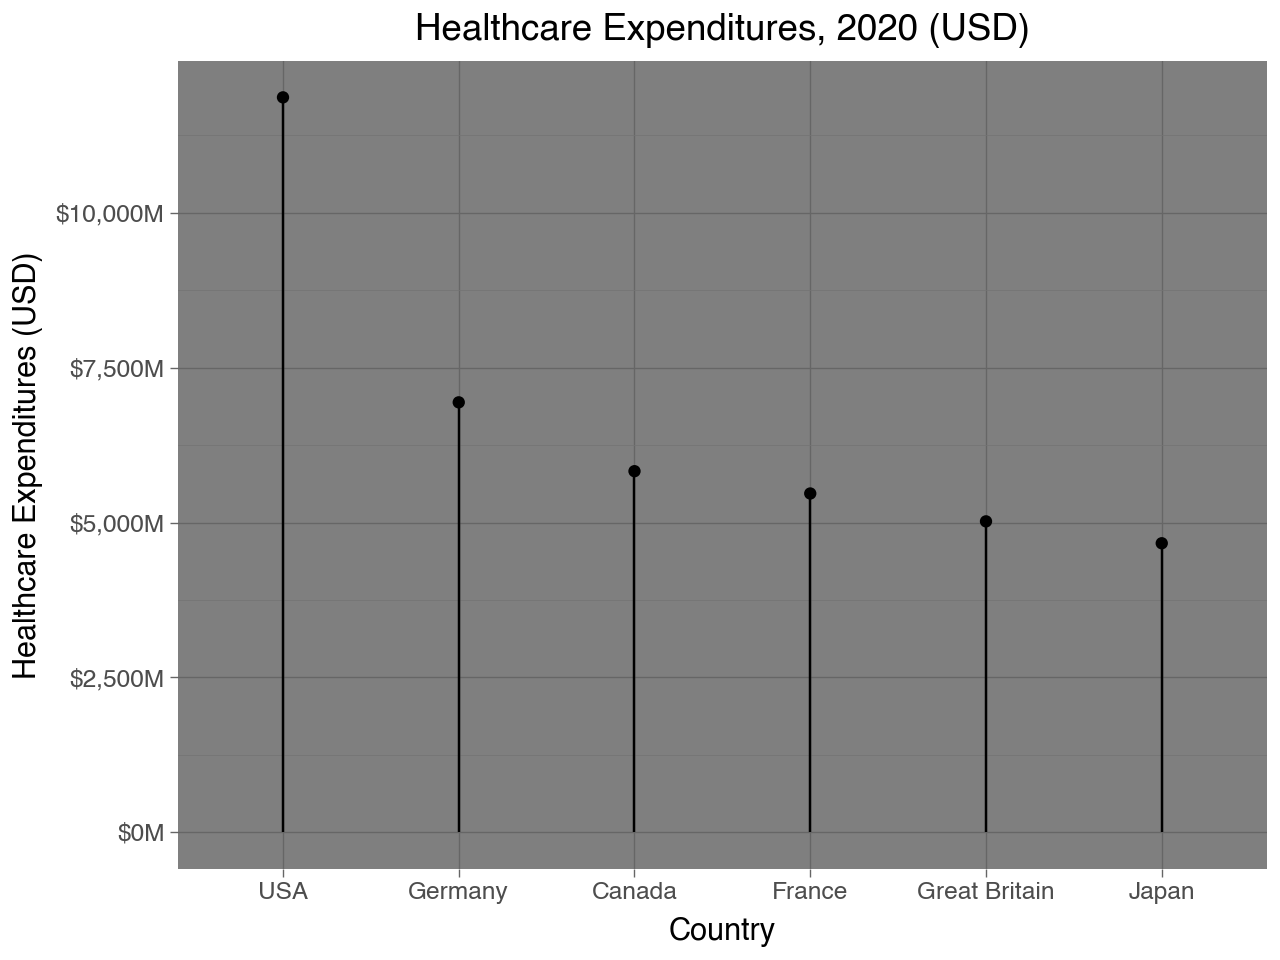

In [28]:
lollies + theme_dark()

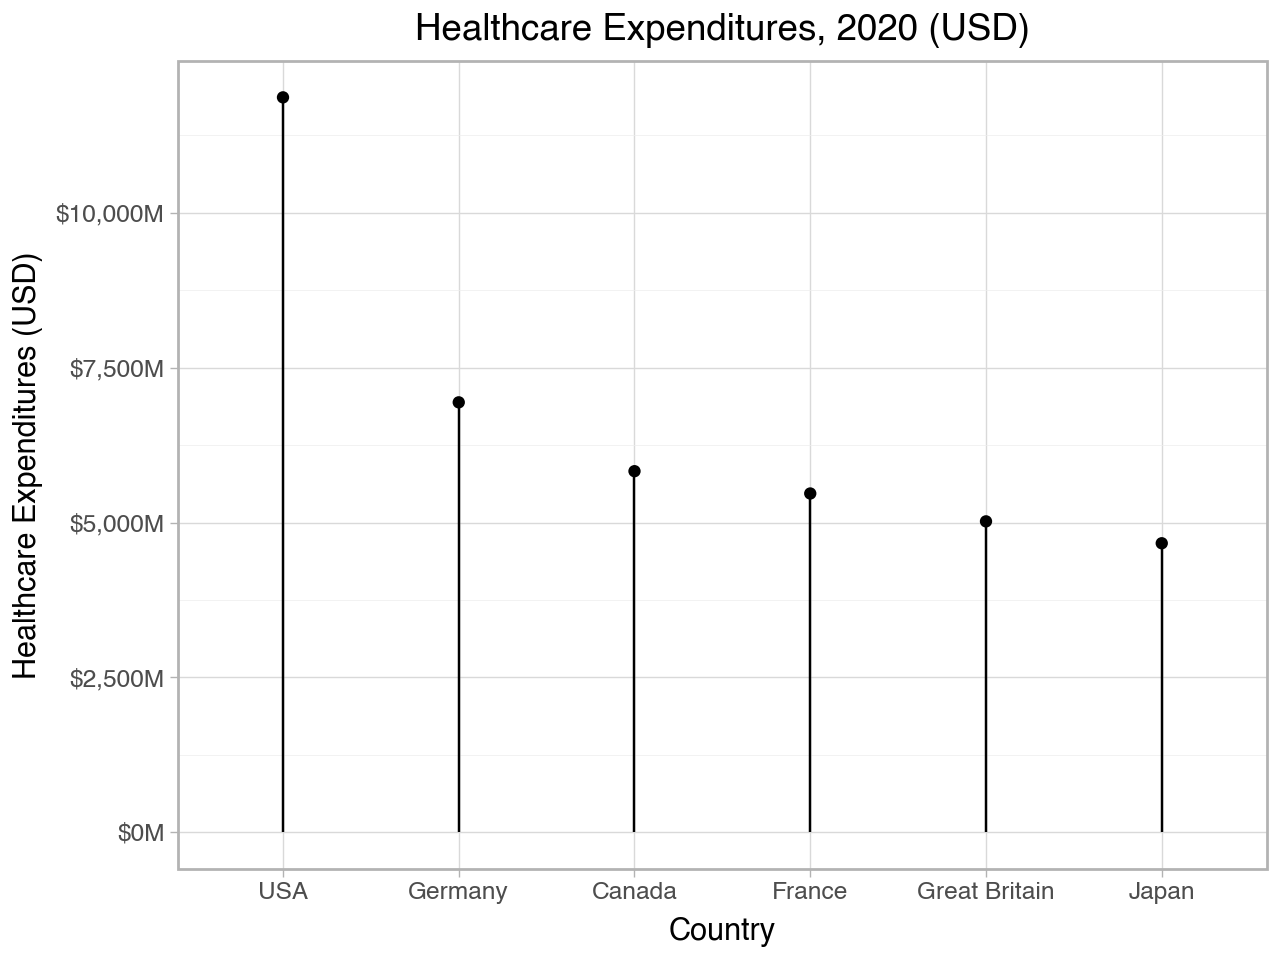

In [29]:
lollies + theme_light()

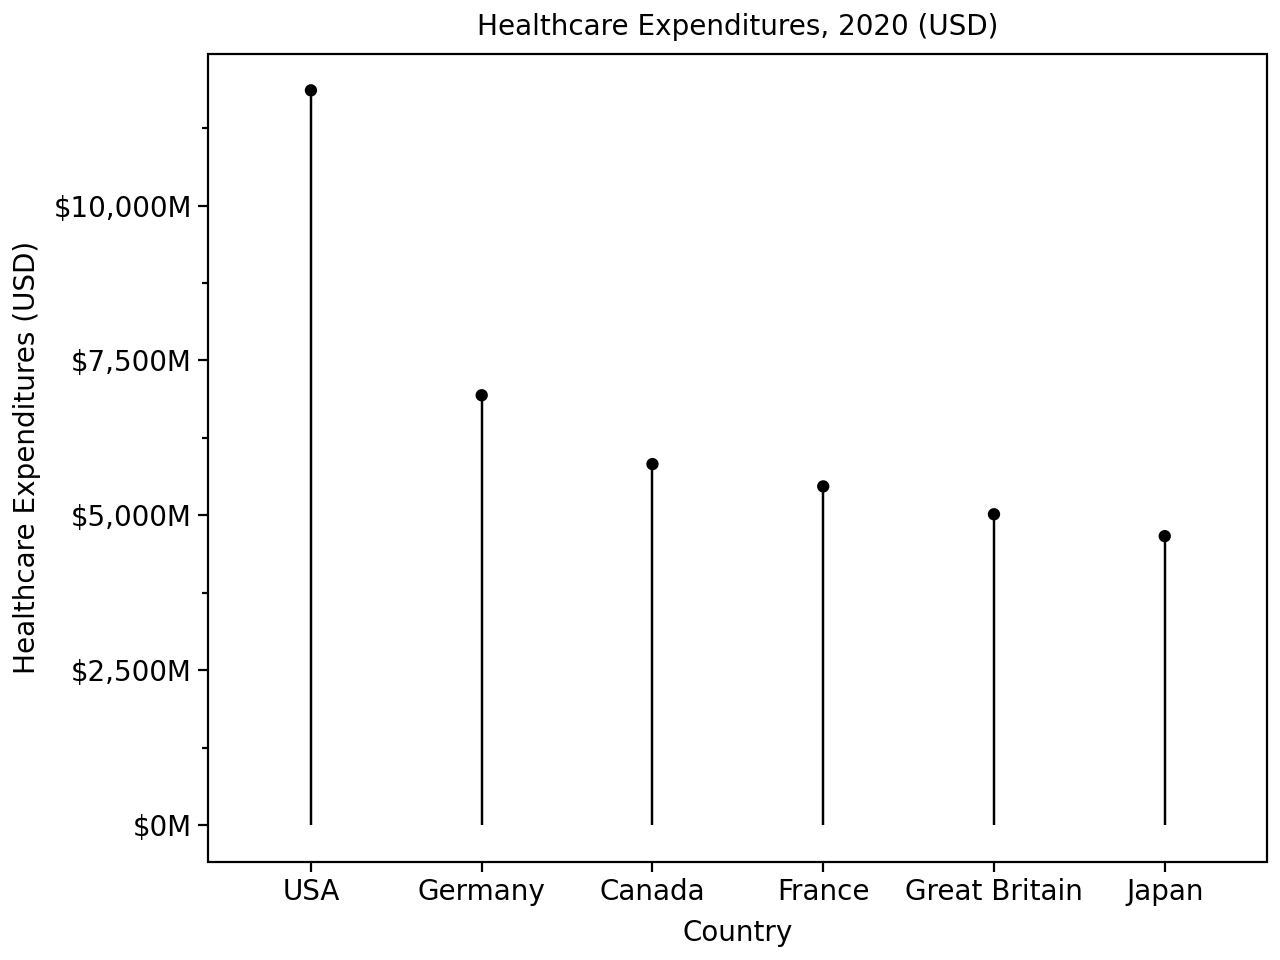

In [30]:
lollies + theme_matplotlib()

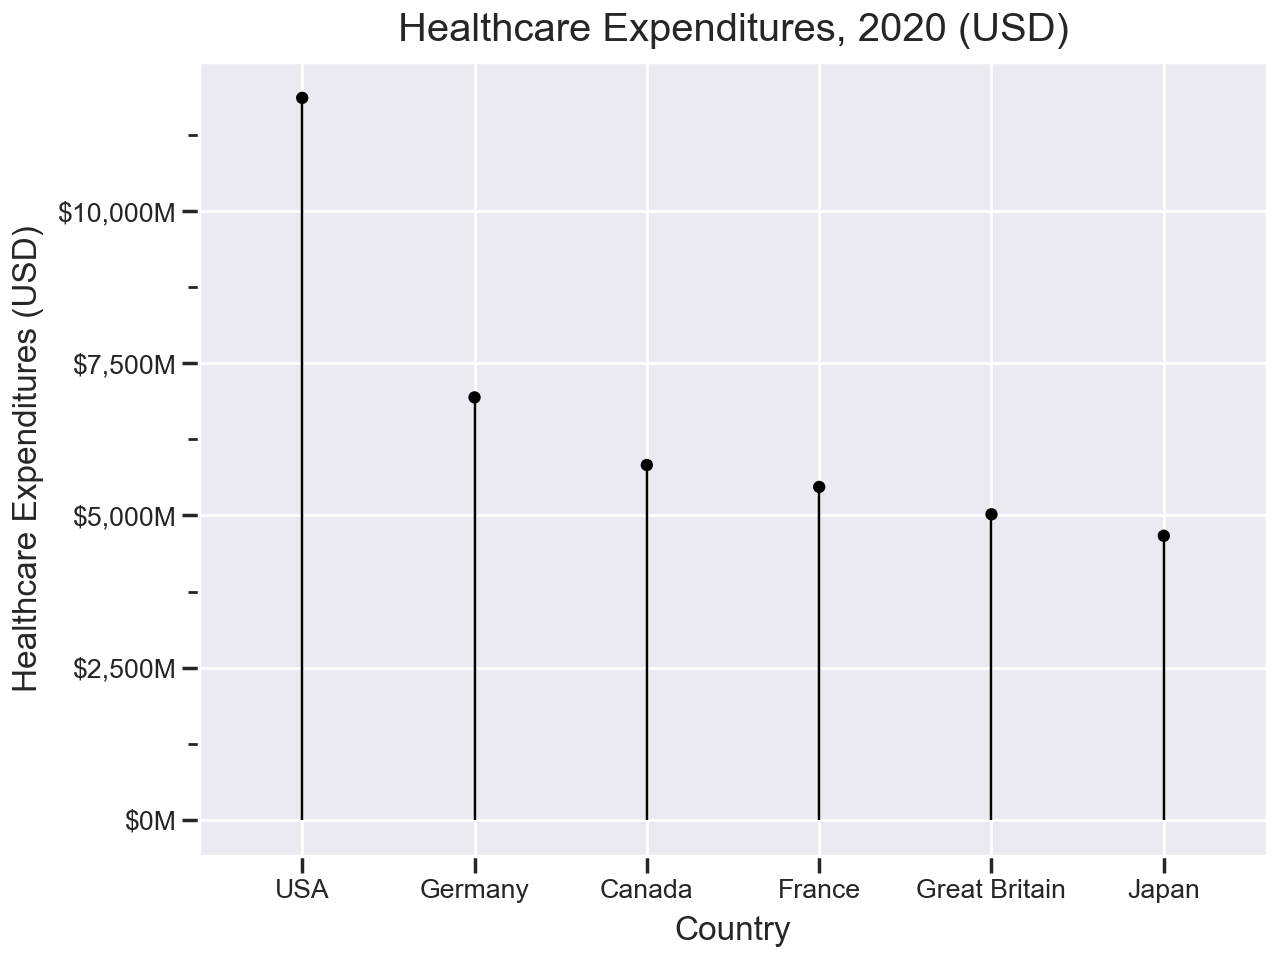

In [31]:
lollies + theme_seaborn()

## Flipping Axes

It is also very easy to flip the x- and y-axes. All you need to do is add `coord_flip()` to the plot. Below we will take the `lollies` plot and flip the coordinates. We also reverse the ordering of the countries so that the country with the largest expenditure is on the top.

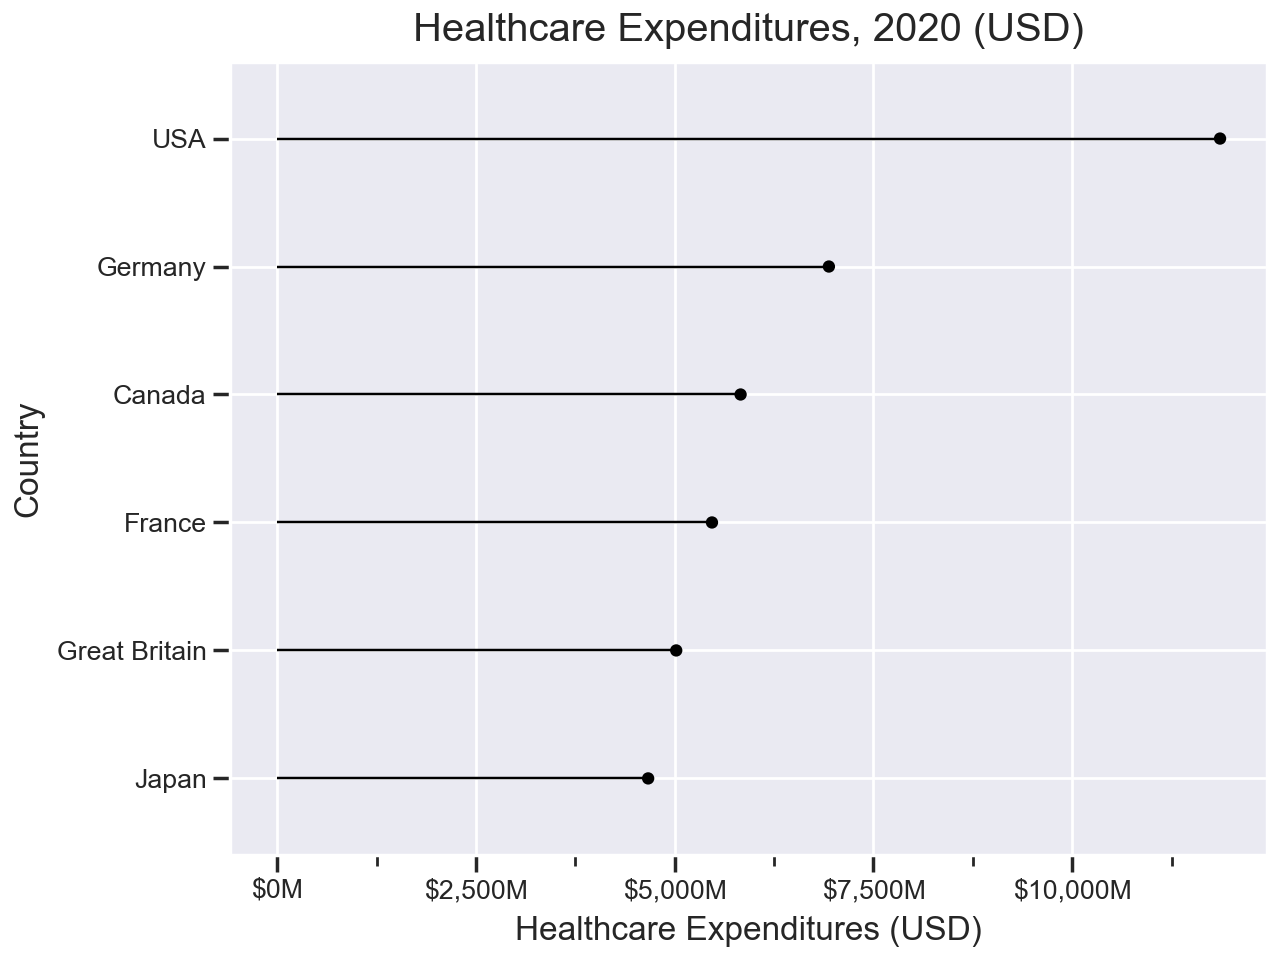

In [32]:
(ggplot(data = health.query('Year == 2020'), 
        mapping = aes(x = 'reorder(Country, Spending_USD)', 
                      y = 'Spending_USD'))   
 + geom_point()
 + geom_segment(mapping = aes(xend = 'Country', yend = 0))
 + scale_y_continuous(labels = lambda l: ["${:,.0f}M".format(n) for n in l])
 + theme_seaborn()
 + coord_flip()
 + labs(
     title = 'Healthcare Expenditures, 2020 (USD)',
     x = 'Country',
     y = 'Healthcare Expenditures (USD)')
)

## Facets

We have seen that one way to add additional variables to a plot is by mapping them to an aesthetic, such as color, fill or size. Another way is to split the plot into "facets," which are subplots that display one subset of the data according to the value of a (preferrably categorical) variable. When we want to subset the plot based on one categorical variable we add a `facet_wrap()` function to the plot. The plot below adds a `facet_wrap()` to one of the plots we saw earler in the chapter to create separate scatterplots by gender for tip vs total bill, colored by day of the week.

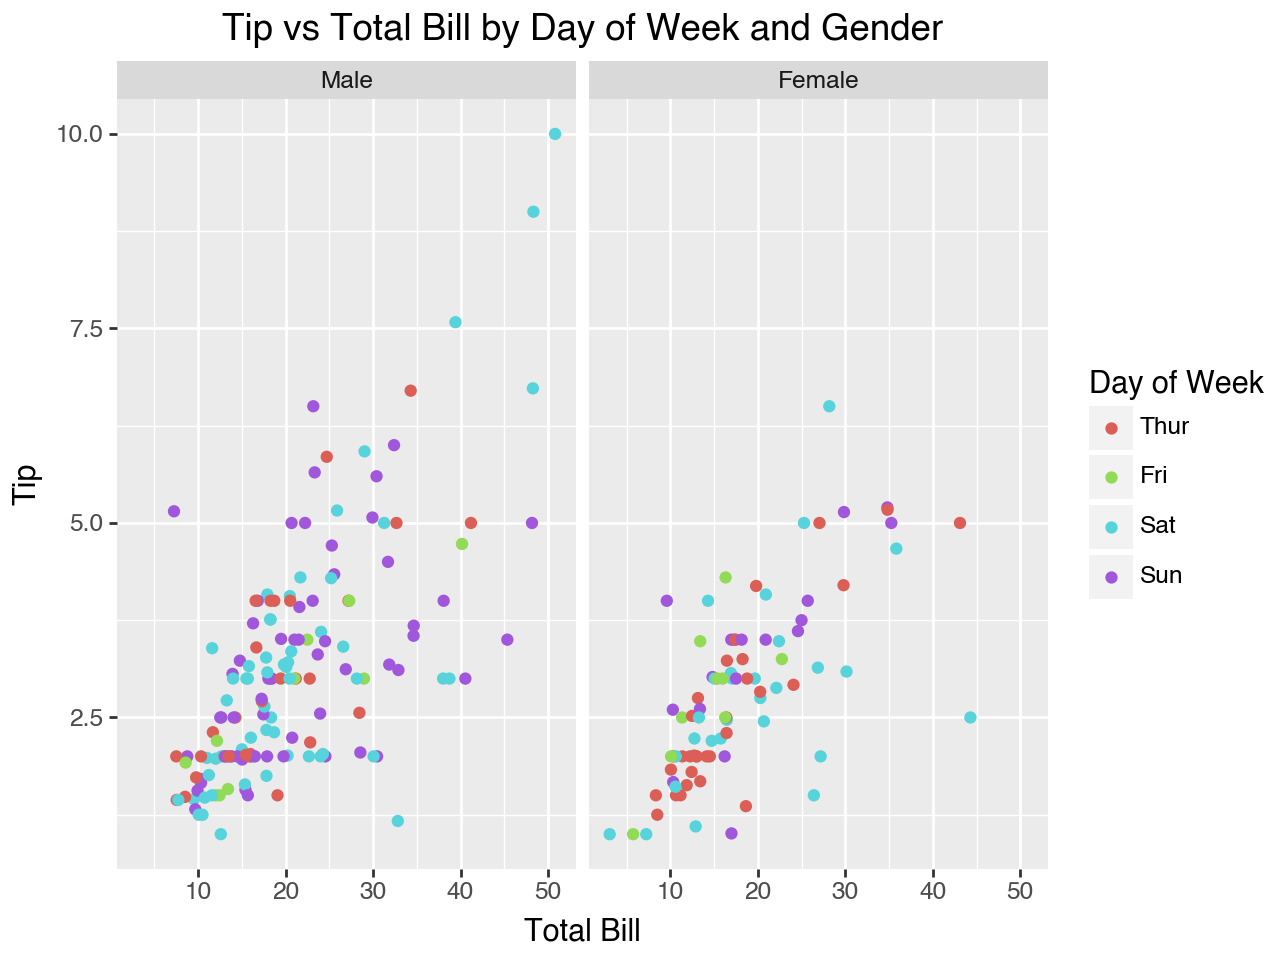

In [33]:
(
    ggplot(data = tips, mapping = aes(x='total_bill', y='tip', color = 'day'))
    + geom_point()
    + facet_wrap(facets = 'sex')
    + labs(
        x = 'Total Bill',
        y = 'Tip',
        title = 'Tip vs Total Bill by Day of Week and Gender',
        color = 'Day of Week'
    )
)

To make subplots based on the values in a combination of categorical variables we can add `facet_grid()` to the plot. Use the `rows` and `cols` parameters to indicate which variable to use for the rows and which variable to use for the columns.

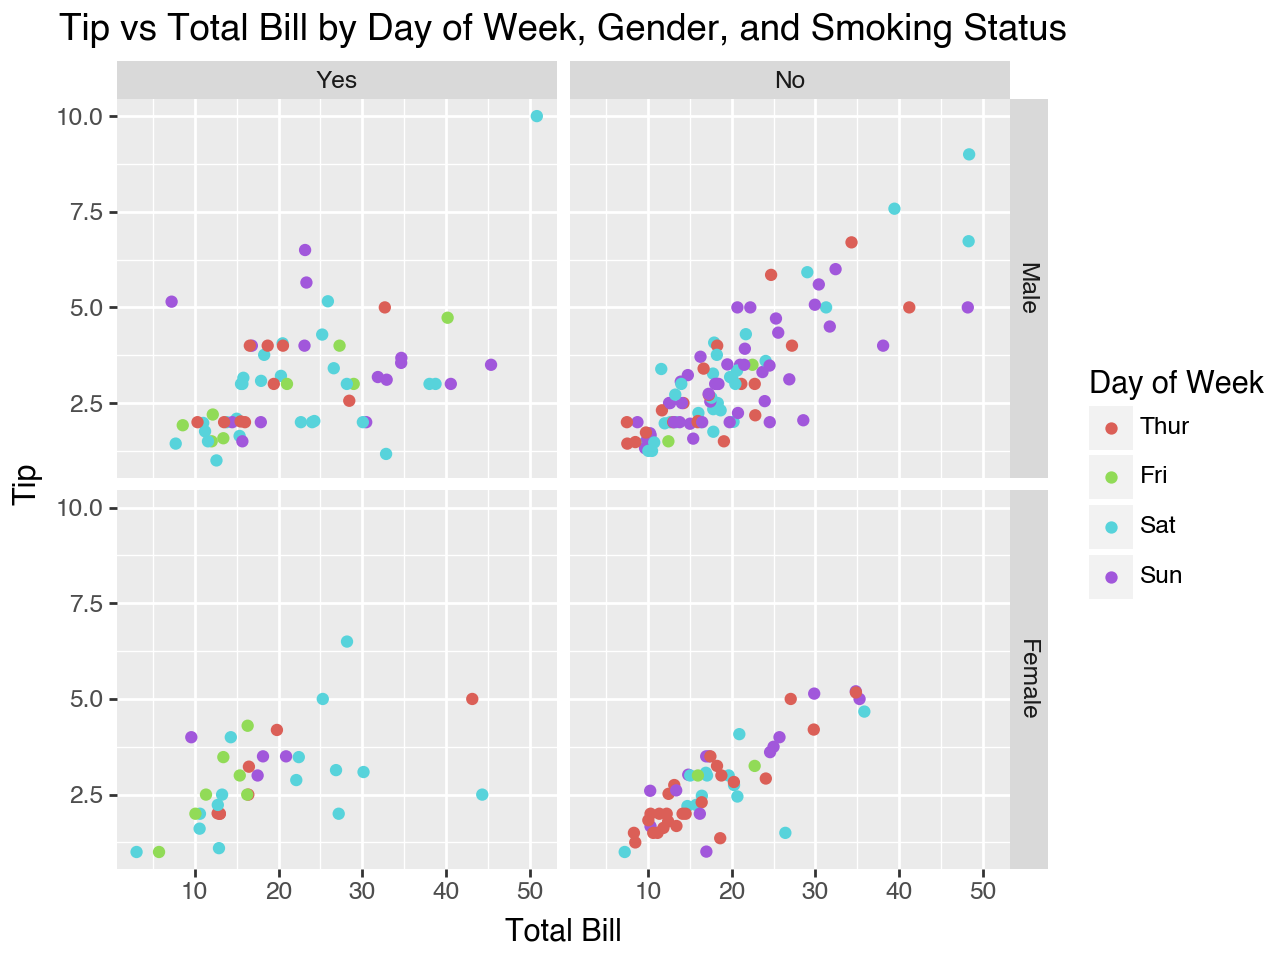

In [34]:
(
    ggplot(data = tips, mapping = aes(x='total_bill', y='tip', color = 'day'))
    + geom_point()
    + facet_grid(rows = 'sex', cols = 'smoker')
    + labs(
        x = 'Total Bill',
        y = 'Tip',
        title = 'Tip vs Total Bill by Day of Week, Gender, and Smoking Status',
        color = 'Day of Week'
    )
)

## Adding Fit Lines

It is common to add a line of fit to a scatterplot to highlight the trend in the data. Plotnine has the `geom_smooth()` function to add a smooth line to the plot produced by some statistical transformation of the data. The default transformation is called loess smoothing, which uses locally-weighted regression to determine the line of fit. The `span` parameter controls the amount of smoothing for the loess smoother. The parameter should be set to a number between 0 and 1, with larger numbers leadig to more smoothing.  

Below we add `geom_smooth()` to one of the scatterplots we created earlier in the chapter to add a line of fit. We set `color = 'red'` for the line of fit and `se = False`. If the `se` parameter ("standard error") is set to `True`, which is the default, a confidence interval is drawn around the smooth line as a shaded area. Please note that you must have the `scikit-misc` package installed for this loess smoothing to work in plotnine. If you don't have scikit-misc installed you can set `se = False` to avoid getting a warning message. The scikit-misc package is not available in the default conda package channel, so you will need to install it into your conda environment with pip (run `pip install scikit-misc` at the command prompt after your environment is activated) or use the conda-forge channel (run `conda install -c conda-forge scikit-misc` at the command prompt after your environment is activated). 

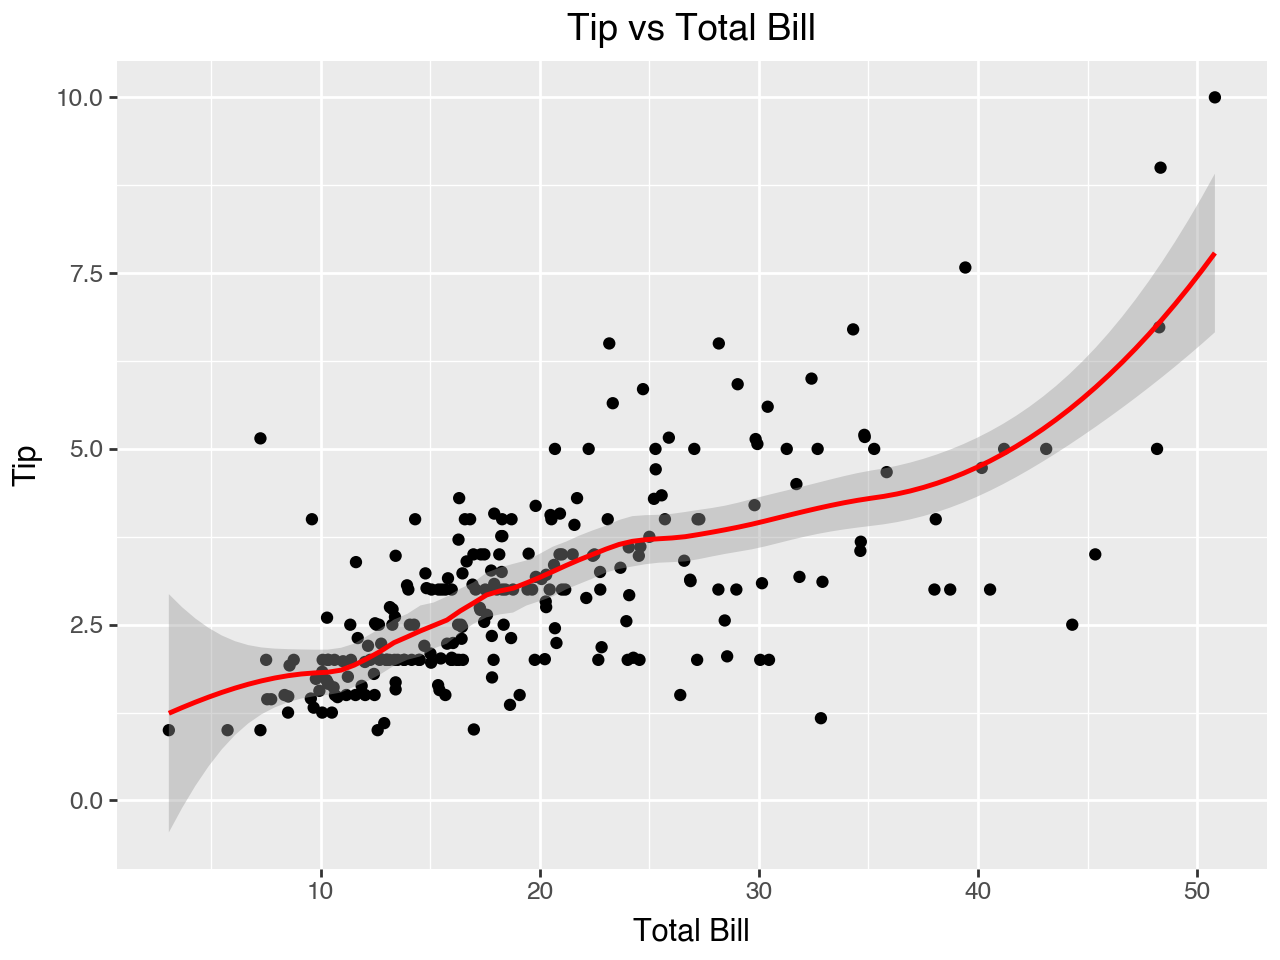

In [35]:
(
    ggplot(data = tips, mapping = aes(x='total_bill', y='tip'))
    + geom_point()
    + geom_smooth(span = 0.4, color = 'red')
    + labs(
        x = 'Total Bill',
        y = 'Tip',
        title = 'Tip vs Total Bill'
    )
)

To produce a straight line of fit we can set `method = 'ols'` within `geom_smooth()`. This means to use ordinary least squares regression to produce the line of fit. Note that the standard error shading *is* implemented for the 'ols' method, even if you don't have scikit-misc installed.

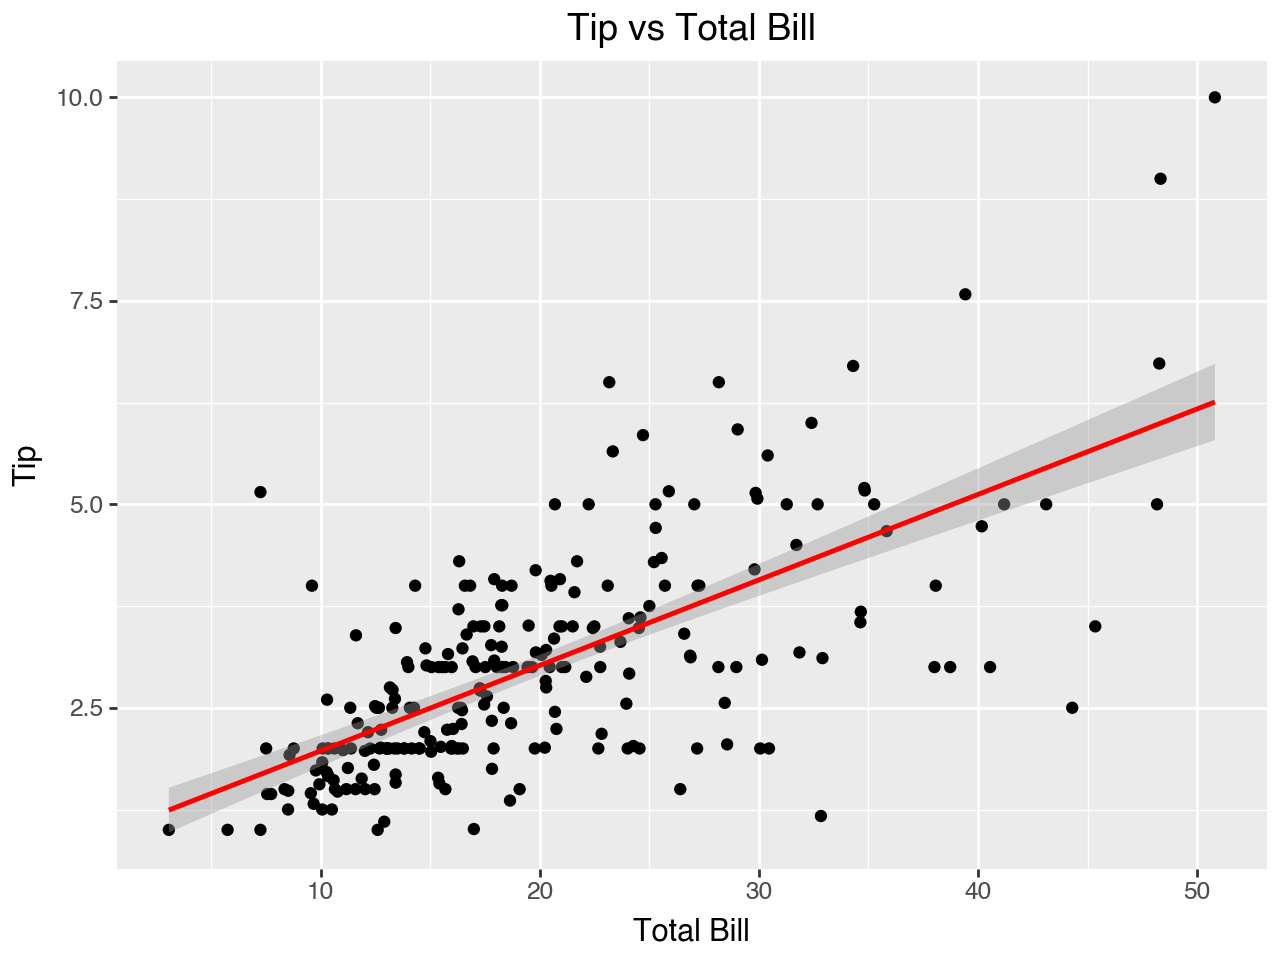

In [36]:
(
    ggplot(data = tips, mapping = aes(x='total_bill', y='tip'))
    + geom_point()
    + geom_smooth(method = 'ols', color = 'red')
    + labs(
        x = 'Total Bill',
        y = 'Tip',
        title = 'Tip vs Total Bill'
    )
)

Let's try coloring the dots in the scatterplot according to the tipper's smoking staus (yes or no). Notice that now two lines of fit are created, one for smokers and one for non-smokers! This is because the mapping of `smoker` to `color` in the `aes()` function within `ggplot()` carries through to all the layers of the plot. 

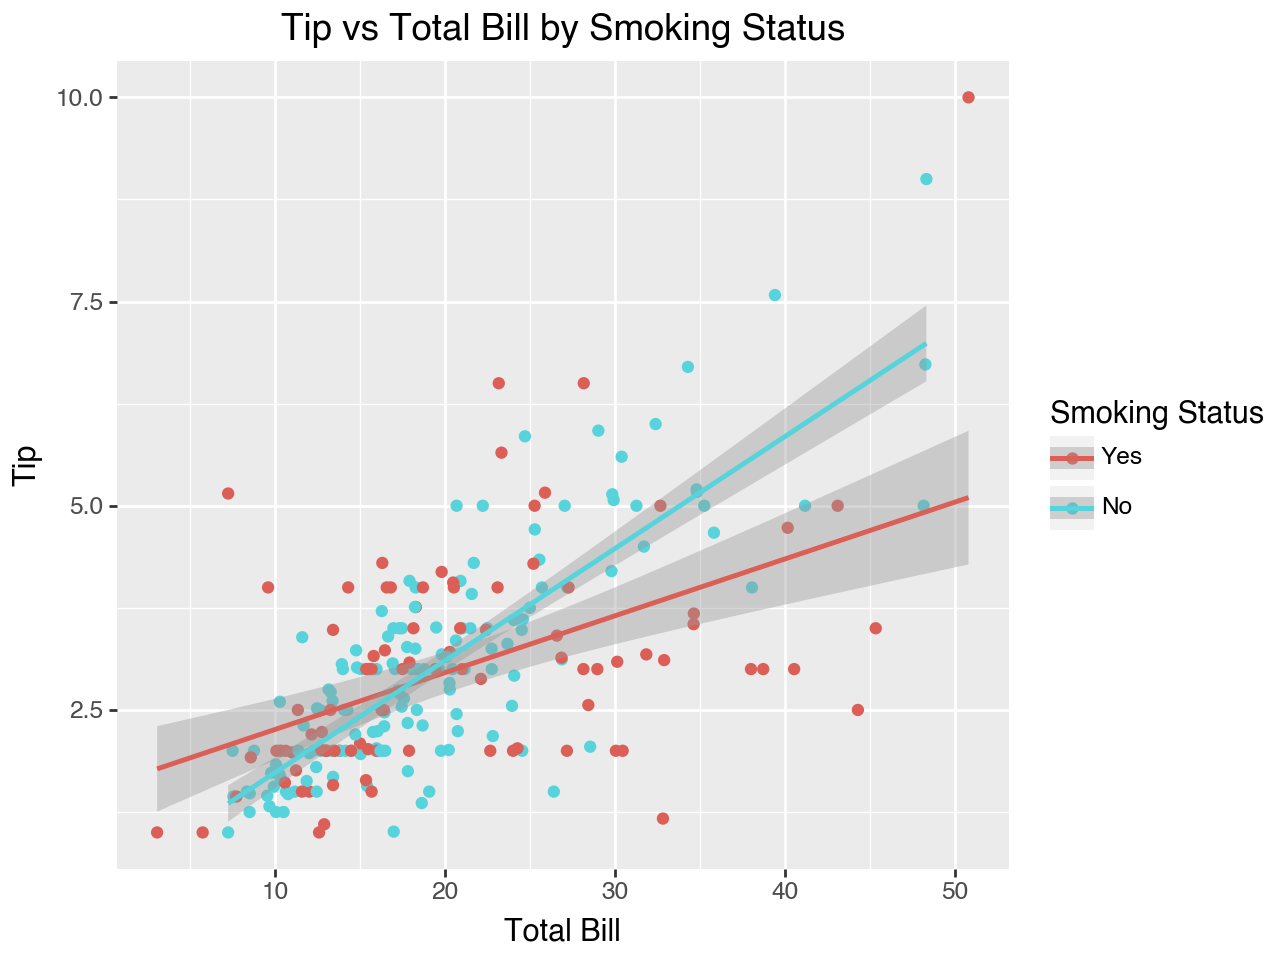

In [37]:
(
    ggplot(data = tips, mapping = aes(x='total_bill', 
                                      y='tip', 
                                      color = 'smoker'))
    + geom_point()
    + geom_smooth(method = 'lm')
    + labs(
        x = 'Total Bill',
        y = 'Tip',
        title = 'Tip vs Total Bill by Smoking Status',
        color = 'Smoking Status'
    )
)

If we don't want separate fit lines for each smoking status we can override the mapping of `color` to `smoker` in the `geom_smooth()` function. To do so, within the `geom_smooth()` function we need to set `inherit_aes = False` to indicate that `geom_smooth()` does not inherit the aesthetic mappings from the `ggplot()` function. Then, we need to specify the aesthetic mapping just for the `geom_smooth()` function. We do so with the `mapping = aes(x='total_bill', y='tip')` parameter setting within `geom_smooth()`.

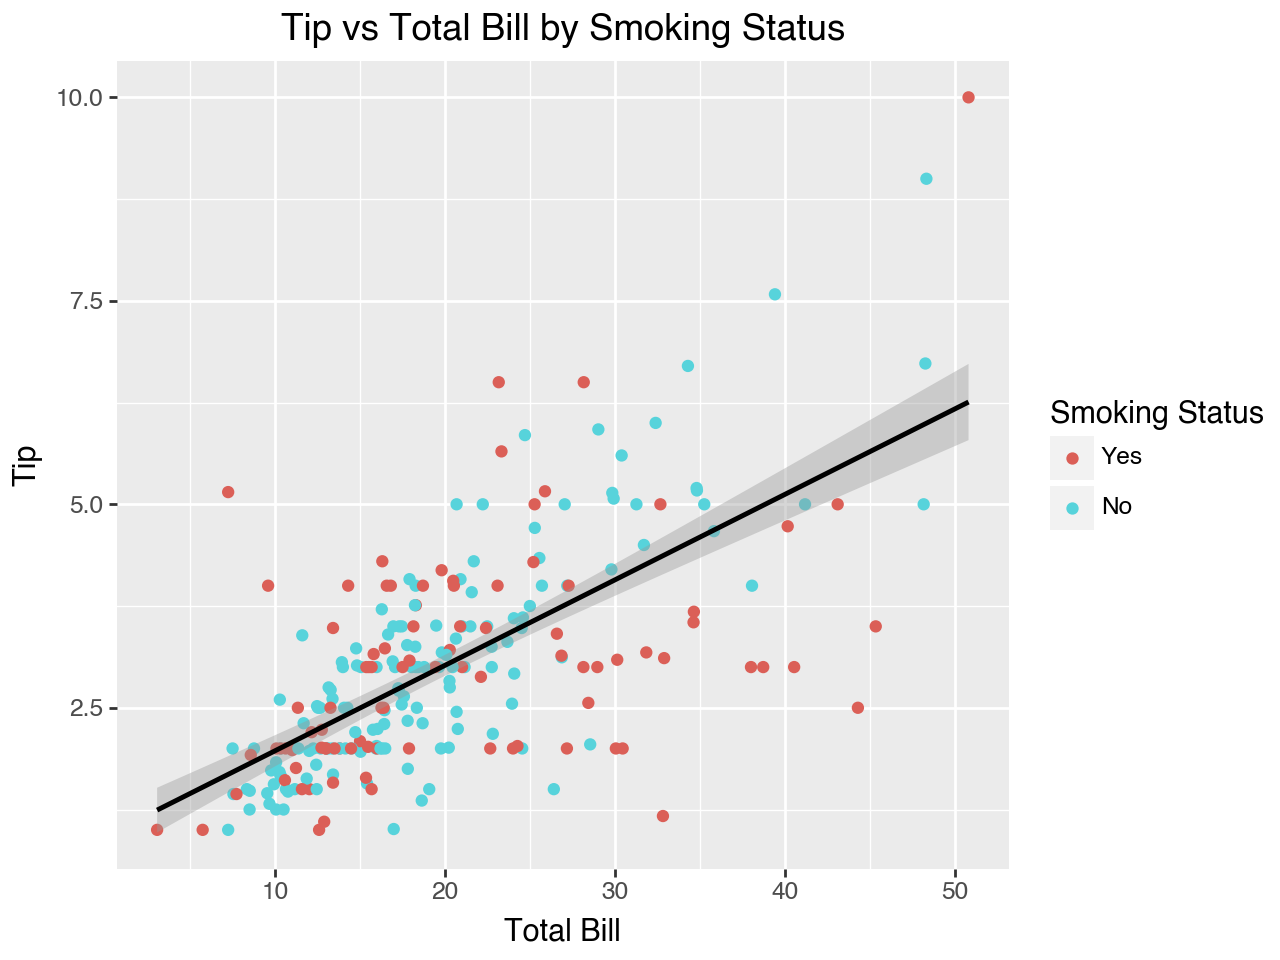

In [38]:
(
    ggplot(data = tips, mapping = aes(x='total_bill', 
                                      y='tip', 
                                      color = 'smoker'))
    + geom_point()
    + geom_smooth(method = 'lm', 
                  mapping = aes(x='total_bill', y='tip'), 
                  inherit_aes = False)
    + labs(
        x = 'Total Bill',
        y = 'Tip',
        title = 'Tip vs Total Bill by Smoking Status',
        color = 'Smoking Status'
    )
)

As we have seen, another way to show this same information would be to facet on smoker status.

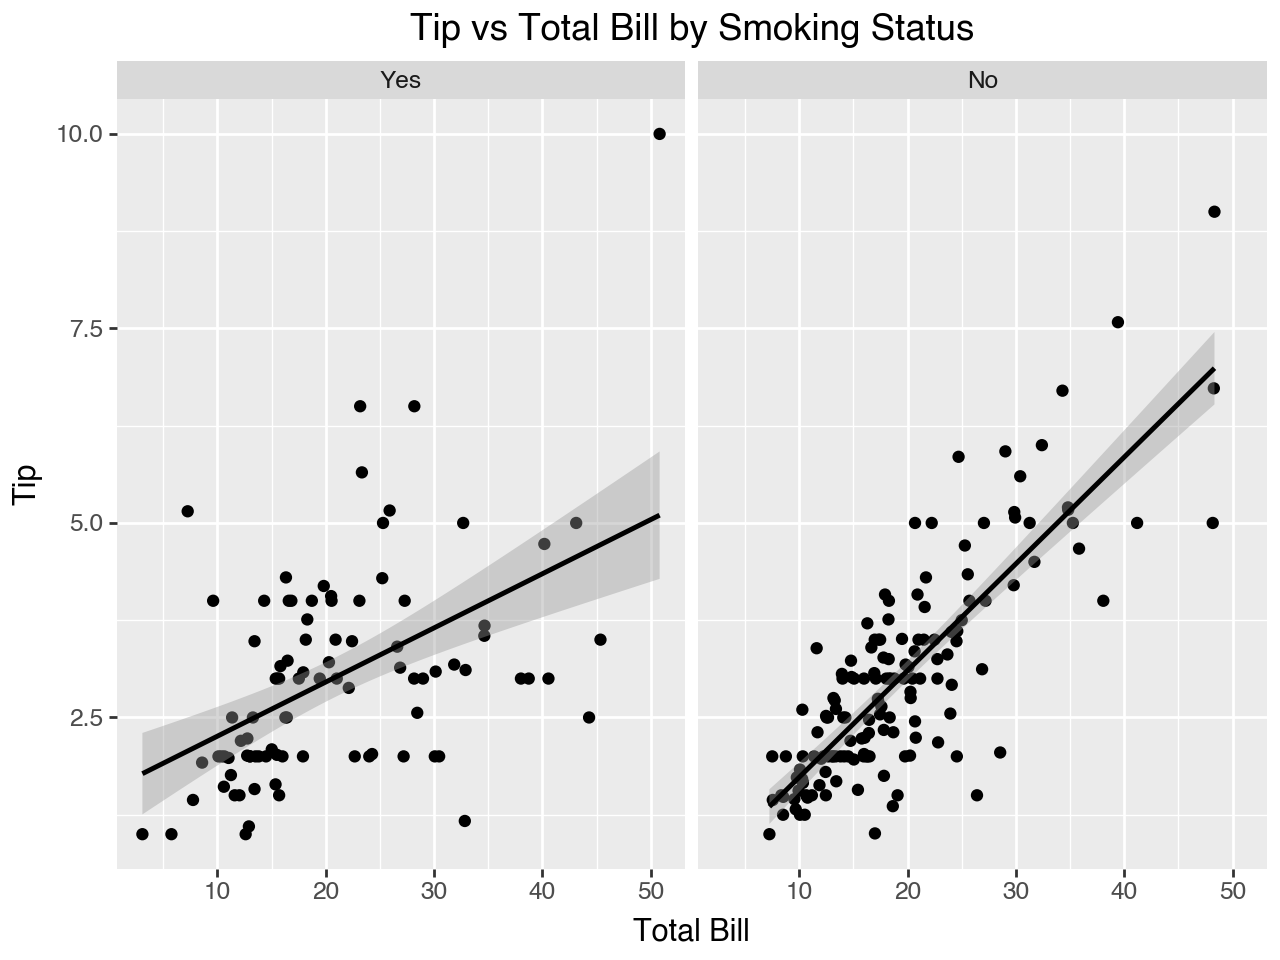

In [39]:
(
    ggplot(data = tips, mapping = aes(x='total_bill', y='tip'))
    + geom_point()
    + geom_smooth(method = 'lm')
    + facet_wrap(facets = 'smoker')
    + labs(
        x = 'Total Bill',
        y = 'Tip',
        title = 'Tip vs Total Bill by Smoking Status',
        color = 'Smoking Status'
    )
)

We could also retain the mapping of `color` to `smoker` along with the faceting to provide two distinctions between smokers and non-smokers: separate colors and separate subplots.

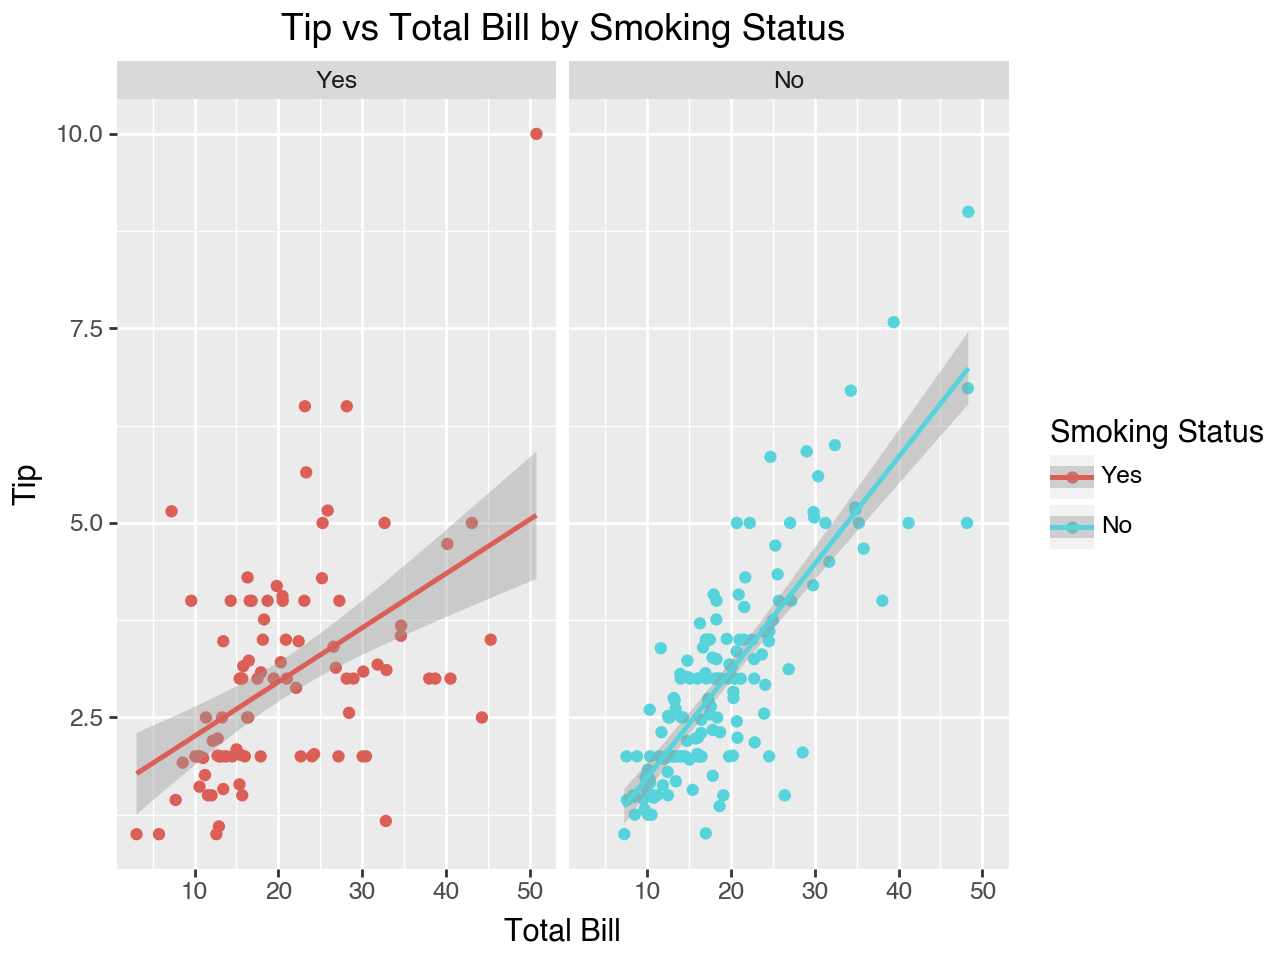

In [40]:
(
    ggplot(data = tips, mapping = aes(x='total_bill', 
                                      y='tip', 
                                      color = 'smoker'))
    + geom_point()
    + geom_smooth(method = 'lm')
    + facet_wrap(facets = 'smoker')
    + labs(
        x = 'Total Bill',
        y = 'Tip',
        title = 'Tip vs Total Bill by Smoking Status',
        color = 'Smoking Status'
    )
)

Let's try that plot using loess smoothing to fit a curved line instead of a straight line.

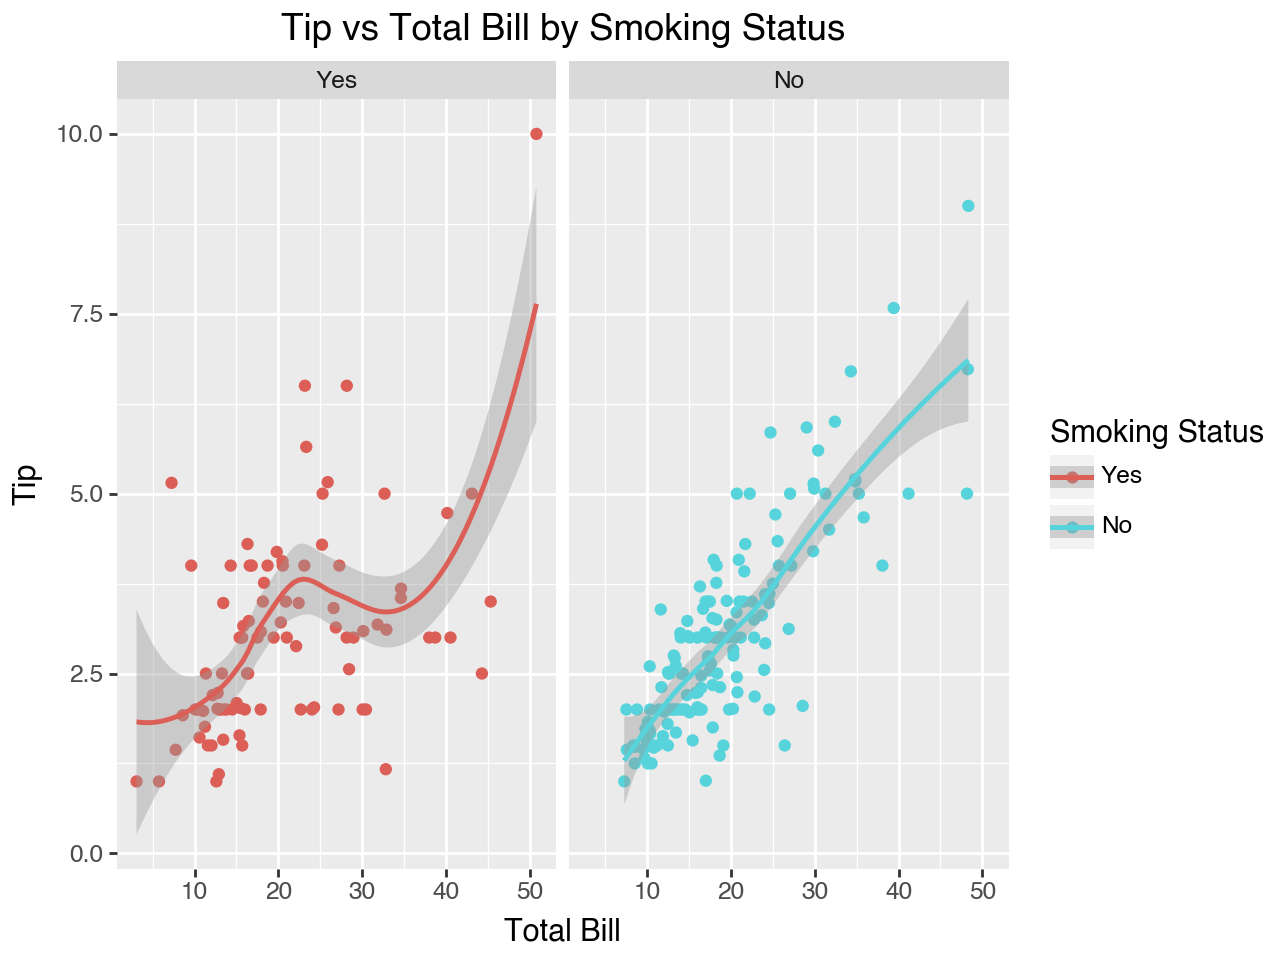

In [41]:
(
    ggplot(data = tips, mapping = aes(x='total_bill', 
                                      y='tip', 
                                      color = 'smoker'))
    + geom_point()
    + geom_smooth()
    + facet_wrap(facets = 'smoker')
    + labs(
        x = 'Total Bill',
        y = 'Tip',
        title = 'Tip vs Total Bill by Smoking Status',
        color = 'Smoking Status'
    )
)

## How to Learn More

This chapter has given you an overview of some of the features of plotnine. There are many more features! To learn more about plotting with plotnine I recommend looking through the [website for the plotnine package](https://plotnine.org) In particular, take a look at the [gallery section](https://plotnine.org/gallery/) for examples of the types of plots that can be created with plotnine and the [API reference](https://plotnine.org/reference/) to browse through all the functions and the parameters they can take.  

A good tutorial for plotnine is Jeroen Janssens' [Plotnine: Grammar of Graphics for Python](https://jeroenjanssens.com/plotnine/). To make the tutorial he translates two chapters of Hadley Wickham's book [R for Data Science](https://r4ds.had.co.nz/) into plotnine code. These two chapters provide a great overview of R's ggplot2 package, the package that plotnine attempts to clone in python. Note that there is a newer version of *R for Data Science* available [at this link](https://r4ds.hadley.nz/).

You can also look online for the many examples of plots created in R with ggplot2 and see if you can recreate the plot with plotnine.